<a href="https://colab.research.google.com/github/MathalinAK/attendance/blob/main/mltask1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler




In [ ]:
cols=["fLength","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]
df = pd.read_csv("magic04.data", names=cols)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [ ]:
(df["class"].value_counts())

class
g    12332
h     6688
Name: count, dtype: int64

In [ ]:
df["class"] = df["class"].apply(str)


In [ ]:
df["class"] = df["class"].apply(str)  # Convert all values to strings


In [ ]:
df["class"]=(df["class"] == "g").astype(int)


In [ ]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

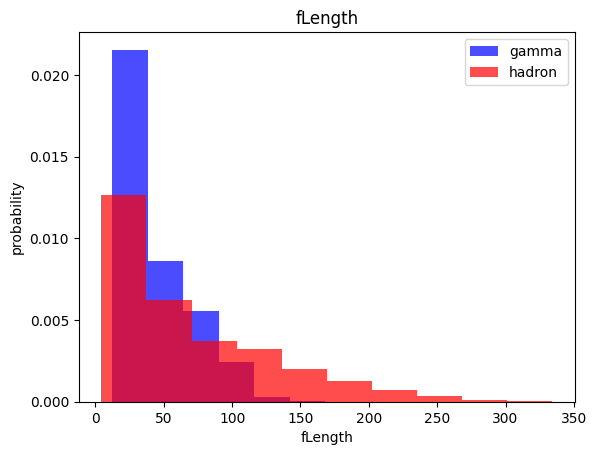

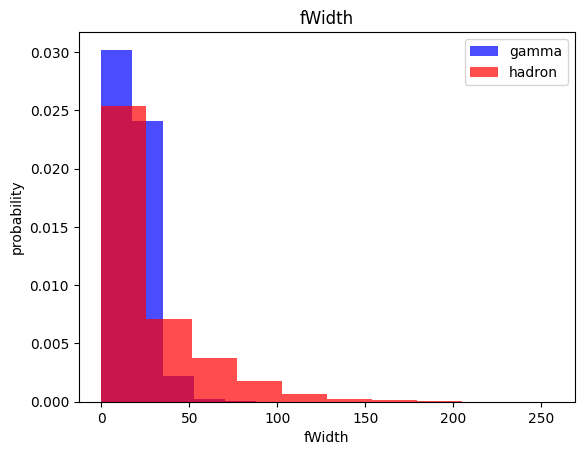

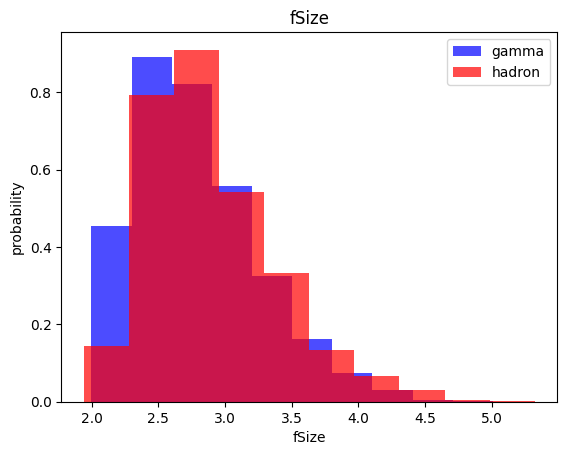

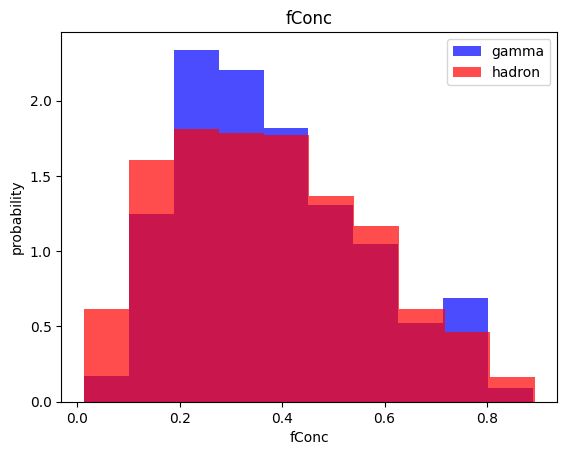

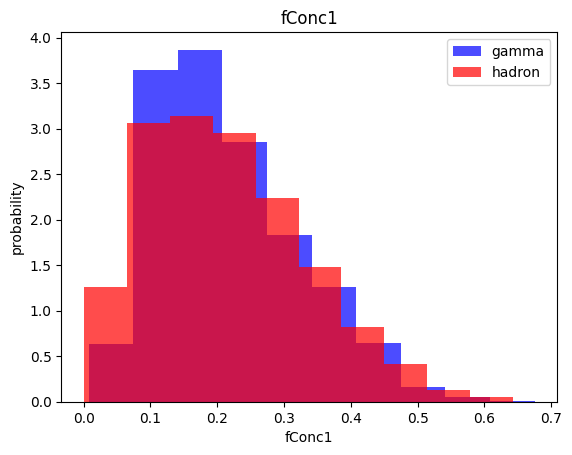

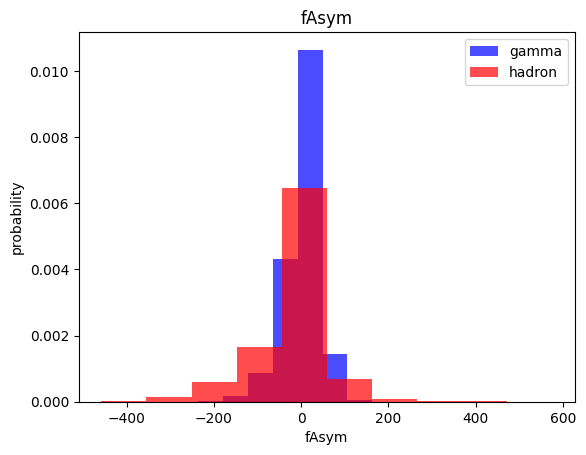

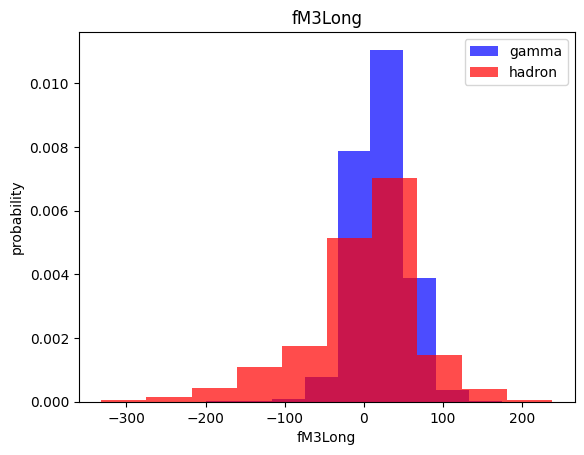

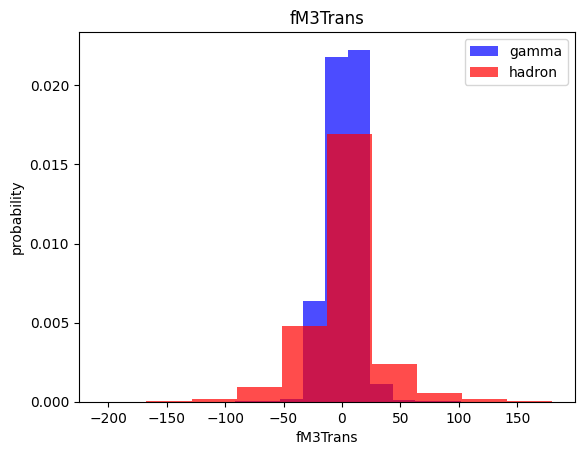

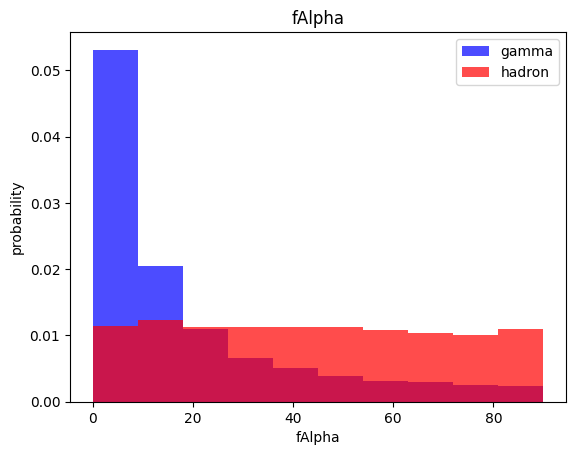

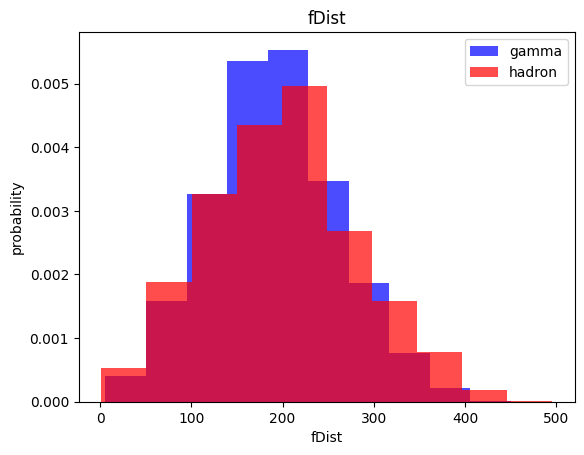

In [ ]:
for label in cols[:-1]:
  plt.hist(df[df["class"] == 1][label],color='blue',label='gamma',alpha=0.7,density=True)
  plt.hist(df[df["class"] == 0][label],color='red',label='hadron',alpha=0.7,density=True)
  plt.title(label)
  plt.ylabel("probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [ ]:
 train, valid, test=np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])


In [ ]:
def scale_dataset(dataframe, oversample=False):
  x=dataframe[dataframe.columns[:-1]].values
  y=dataframe[dataframe.columns[-1]].values
  scaler=StandardScaler()
  x=scaler.fit_transform(x)
  data=np.hstack((x,np.reshape(y,(-1,1))))
  return data,x,y




In [ ]:
train

fLength    fWidth   fSize   fConc  fConc1    fAsym   fM3Long  \
14263   17.7434   10.8338  2.4472  0.5750  0.2911  -2.5607    8.6875   
18569   46.5761   27.8830  2.6706  0.2393  0.1272 -39.3968   -4.6151   
15800   15.0509   12.2064  2.4843  0.6623  0.3361  -1.2266    1.9075   
12978   92.1397   53.6752  3.0382  0.2175  0.1460 -26.7572 -121.8984   
6742    65.4980   20.9142  3.0934  0.1782  0.1052  48.9853   57.1237   
...         ...       ...     ...     ...     ...      ...       ...   
14709   24.8952   11.4458  2.6851  0.4109  0.2456  24.0332   26.7974   
2503    47.8108   20.5476  3.0445  0.1913  0.1015  57.6978  -19.8689   
7721    46.7975   17.5907  3.3597  0.2446  0.1247 -11.6847   34.8436   
10714   50.0093   20.7716  3.0957  0.2712  0.1448   8.3385   42.9655   
16330  142.8720  110.8500  4.4417  0.0431  0.0231   5.3578   88.0680   

       fM3Trans   fAlpha     fDist  class  
14263   -4.9125  35.5620  155.5650      0  
18569  -21.8772   6.0435  124.3839      0  
15800   -3.2387  62.1054  220.5360      0  
12978   21.4054   9.0489  103.5638      0  
6742     6.5693  63.8860   76.3174      1  
...         ...      ...       ...    ...  
14709   -3.9032  72.4573  186.4652      0  
2503     7.6107   8.4572  196.3960      1  
7721    -8.8063   0.3720  185.0420      1  
10714    7.0008   7.9705  139.6570      1  
16330   65.5750  81.3496  267.8280      0  

[11412 rows x 11 columns]

In [ ]:
train,x_train,y_train =scale_dataset(train,oversample=True)
valid,x_valid,y_valid =scale_dataset(valid,oversample=False)
test,x_test,y_test =scale_dataset(test,oversample=False)

KNN(k-nearest neighbor algorithm)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier(n_neighbors=1)
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
y_pred=knn_model.predict(x_test)
y_pred

array([1, 1, 1, ..., 0, 1, 1])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.67      0.71      1289
           1       0.84      0.89      0.86      2515

    accuracy                           0.81      3804
   macro avg       0.80      0.78      0.79      3804
weighted avg       0.81      0.81      0.81      3804



naive bayes


In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_model=GaussianNB()
nb_model=nb_model.fit(x_train,y_train)

In [ ]:
y_pred=nb_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.39      0.50      1289
           1       0.74      0.91      0.82      2515

    accuracy                           0.73      3804
   macro avg       0.72      0.65      0.66      3804
weighted avg       0.72      0.73      0.71      3804



logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lg_model=LogisticRegression()
lg_model=lg_model.fit(x_train,y_train)

In [ ]:
y_pred=lg_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.61      0.68      1289
           1       0.82      0.91      0.86      2515

    accuracy                           0.80      3804
   macro avg       0.79      0.76      0.77      3804
weighted avg       0.80      0.80      0.80      3804



support vector machine

In [ ]:
from sklearn.svm import SVC
svm_model=SVC()
svm_model=svm_model.fit(x_train,y_train)
y_pred=svm_model.predict(x_test)
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.89      0.69      0.78      1289
           1       0.86      0.96      0.90      2515

    accuracy                           0.87      3804
   macro avg       0.87      0.82      0.84      3804
weighted avg       0.87      0.87      0.86      3804



tensorflow


In [ ]:
import tensorflow as tf


In [ ]:
#plotting the loss
def plot_loss(history):
    plt.plot(history.history['loss'],label='loss')
    plt.plot(history.history['val_loss'],label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Binary crossentropy')
    plt.legend()
    plt.grid(True)
    plt.show()
#plotting the accuracy
def plot_accuracy(history):
    plt.plot(history.history['accuracy'],label='accuracy')
    plt.plot(history.history['val_accuracy'],label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:

nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(x_train.shape[1],)),  # Use the correct input shape
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the Model
nn_model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)



In [ ]:
def plot_history(history):
  fig, (ax1,ax2)=plt.subplots(1,2,figsize=(10,8))
  ax1.plot(history.history['loss'],label='loss')
  ax1.plot(history.history['val_loss'],label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)
  ax2.plot(history.history['accuracy'],label='accuracy')
  ax2.plot(history.history['val_accuracy'],label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel ('Accuracy')
  ax2.grid(True)
  plt.show()



    # x_train, y_train,
    # epochs=100,#Train for 100 epochs
    # batch_size=32,#Process 32 samples per batch
    # validation_split=0.2,#Use 20% of the data for validation
    # verbose=0#Display training progress

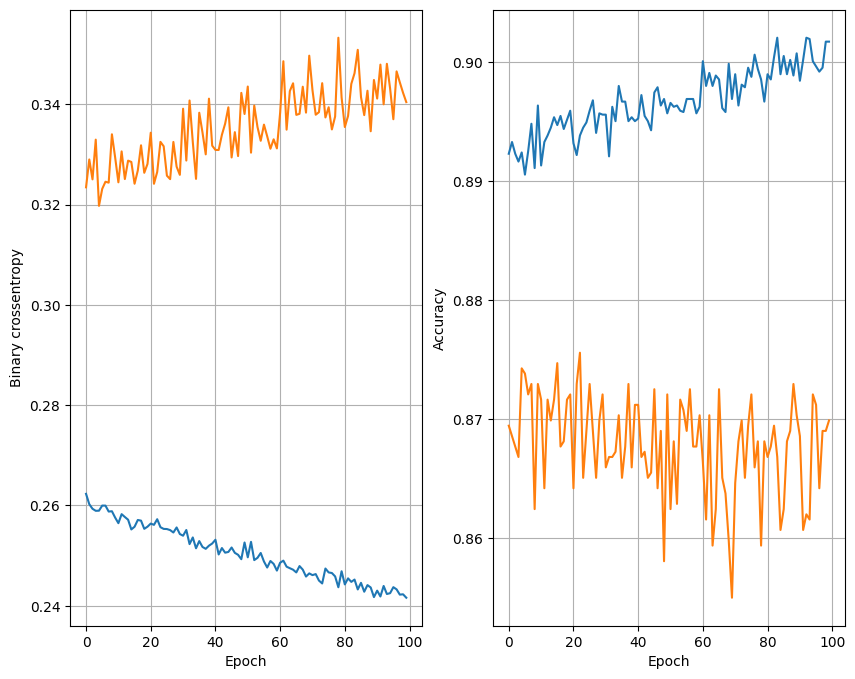

In [ ]:
plot_history(history)

In [105]:
def train_model(x_train,y_train,num_nodes,dropout_prob,lr,batch_size,epochs):
  nn_model=tf.keras.Sequential([
  tf.keras.layers.Dense(num_nodes,activation='relu',input_shape=(10,)),
  tf.keras.layers.Dropout(dropout_prob),
  tf.keras.layers.Dense(num_nodes,activation='relu'),
  tf.keras.layers.Dropout(dropout_prob),
  tf.keras.layers.Dense(1,activation='sigmoid')
  ])
  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr),loss='binary_crossentropy',metrics=['accuracy'])
  history=nn_model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_split=0.2,verbose=0)
  return nn_model,history




16nodes,dropout0,lr0.01,batch size32


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


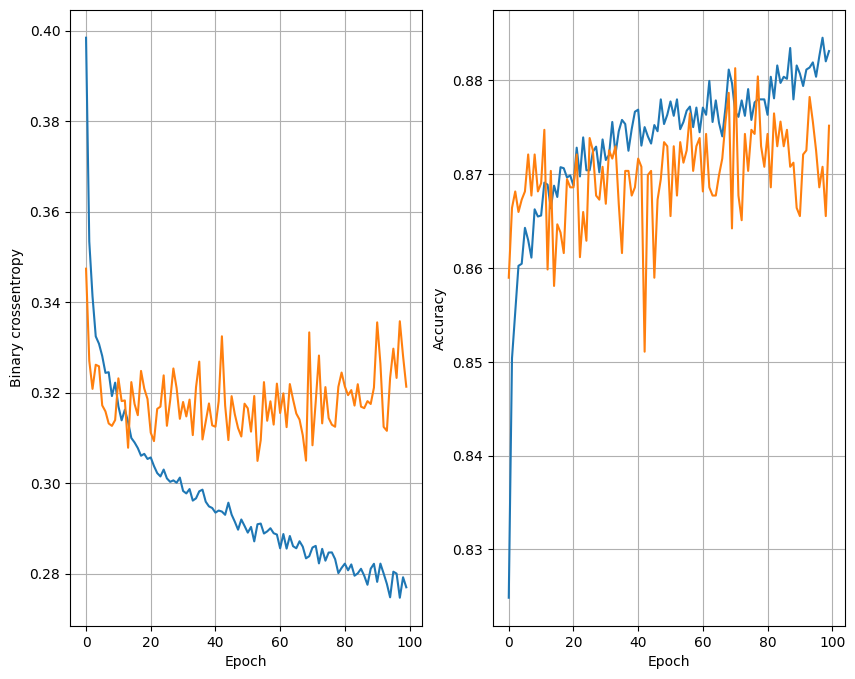

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8781 - loss: 0.3111
16nodes,dropout0,lr0.01,batch size64


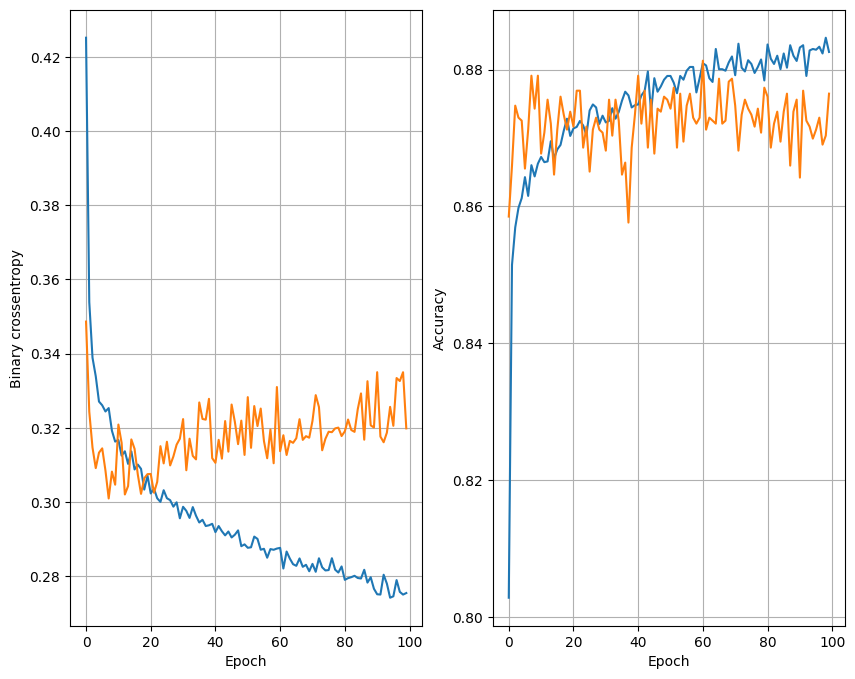

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8697 - loss: 0.3325
16nodes,dropout0,lr0.01,batch size128


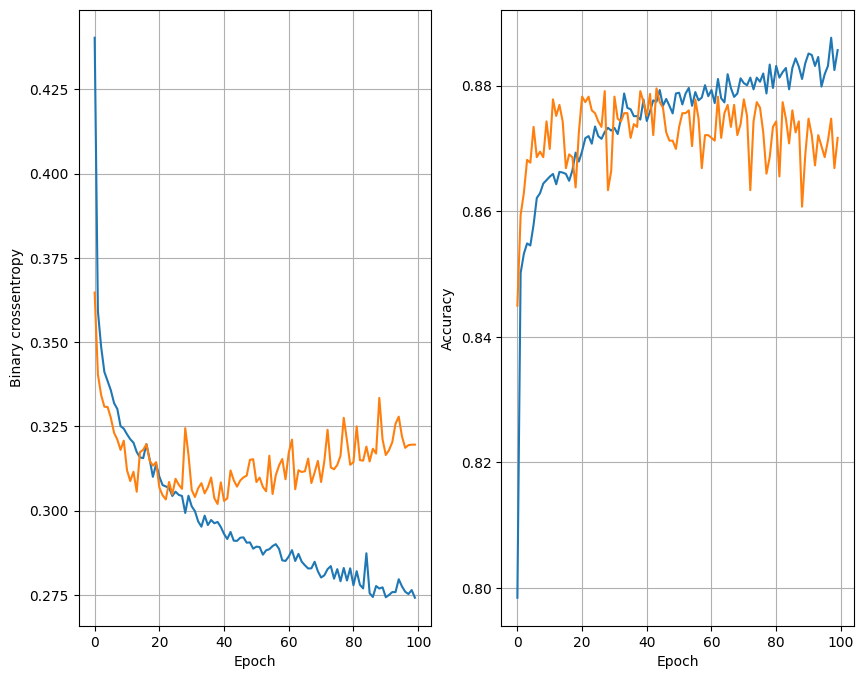

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8751 - loss: 0.3149
16nodes,dropout0,lr0.005,batch size32


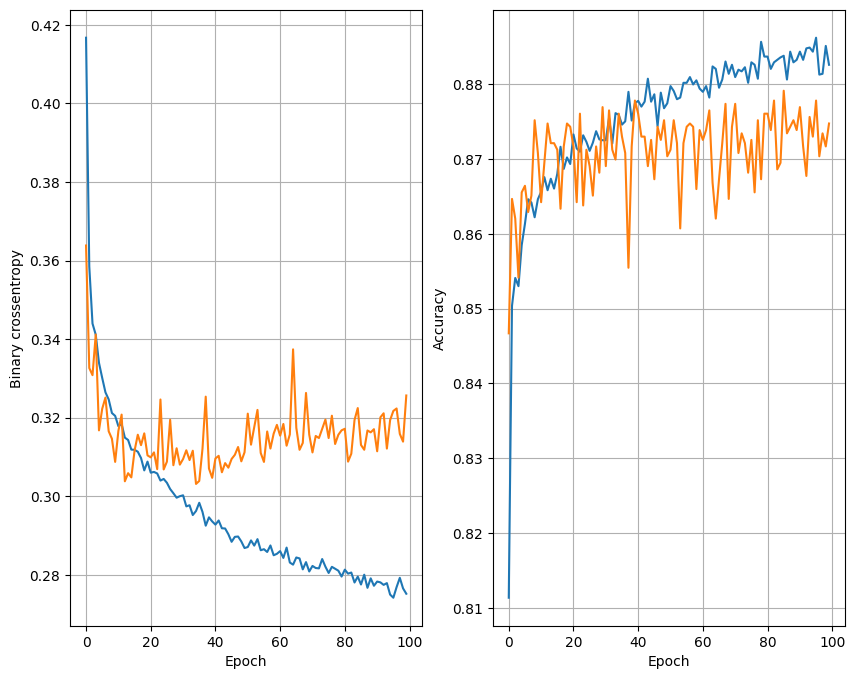

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8777 - loss: 0.3045
16nodes,dropout0,lr0.005,batch size64


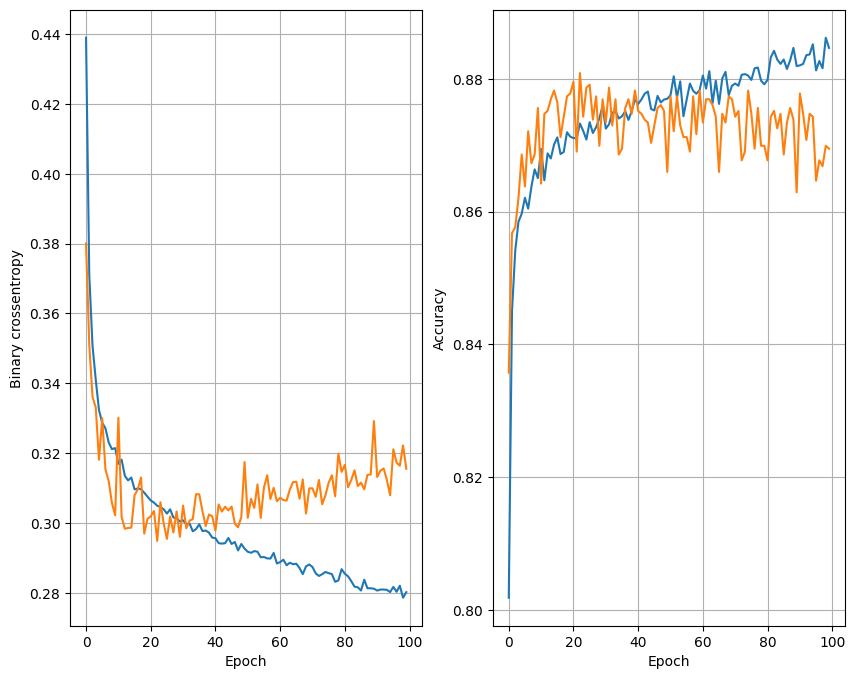

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8726 - loss: 0.3045
16nodes,dropout0,lr0.005,batch size128


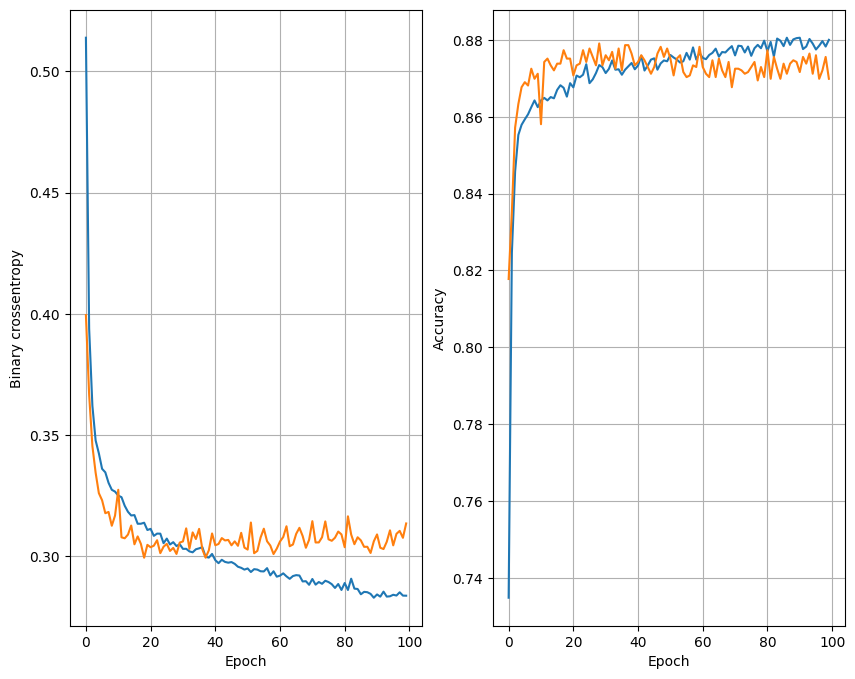

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8771 - loss: 0.2974
16nodes,dropout0,lr0.001,batch size32


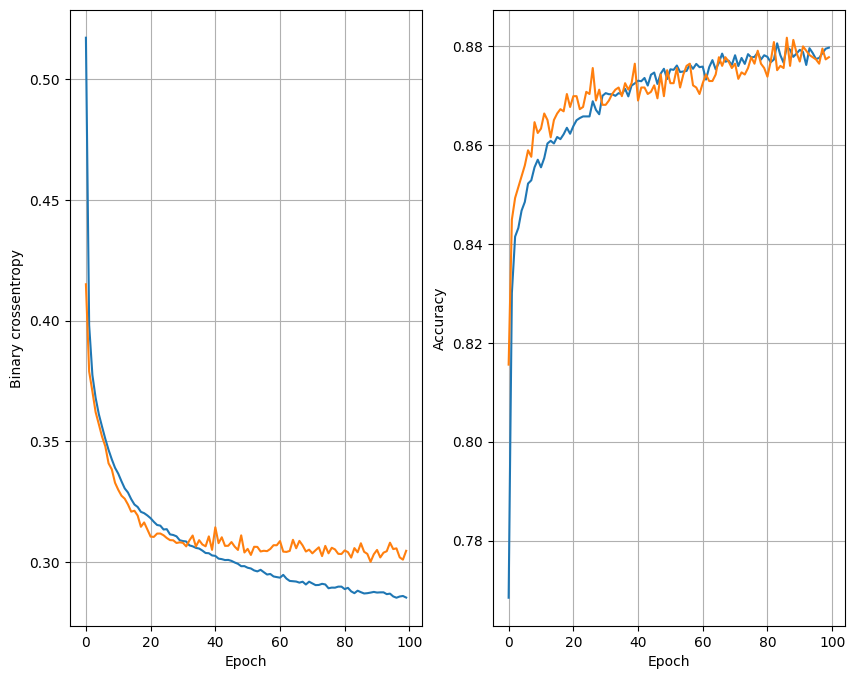

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8857 - loss: 0.3005
16nodes,dropout0,lr0.001,batch size64


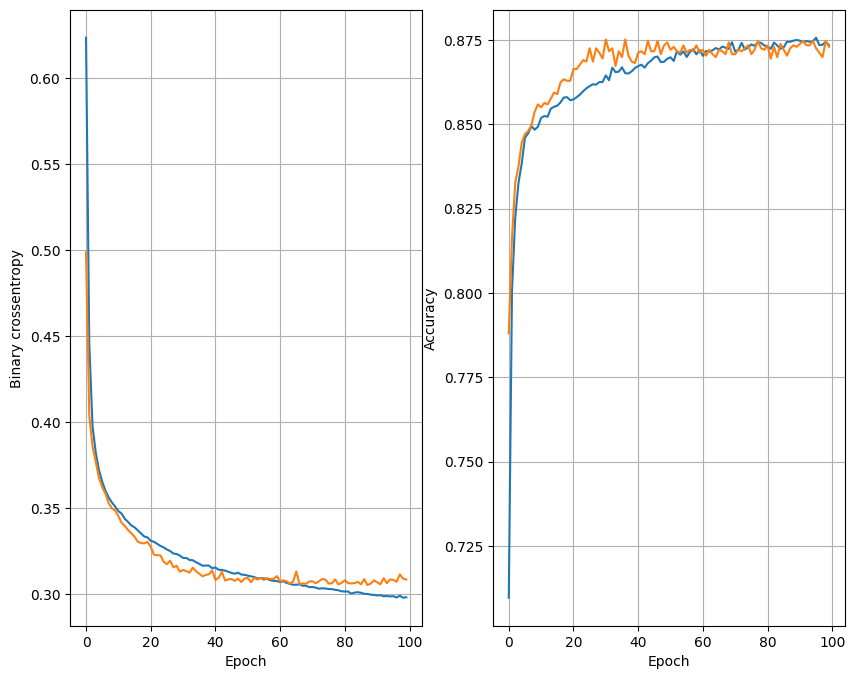

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8862 - loss: 0.3002
16nodes,dropout0,lr0.001,batch size128


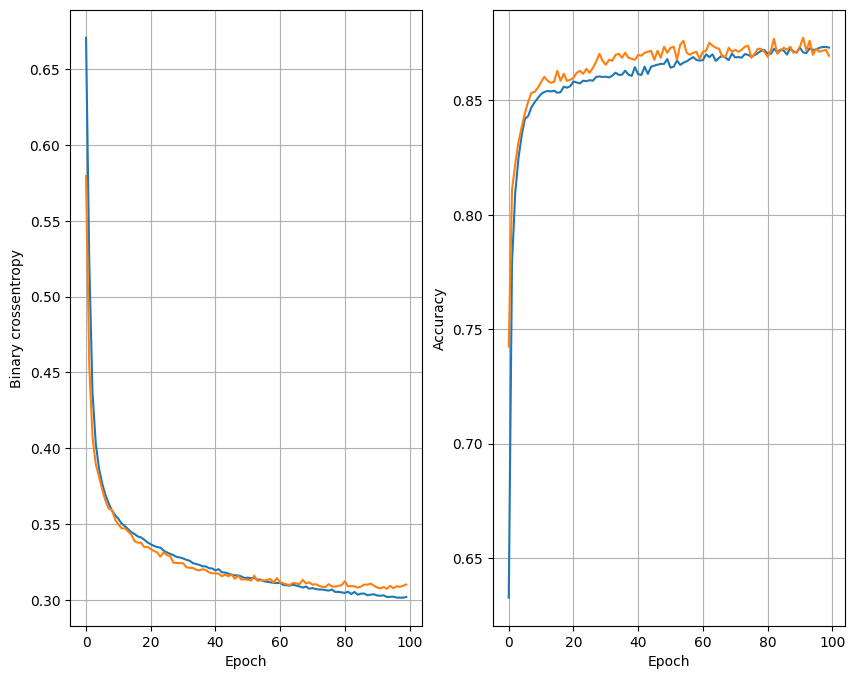

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8794 - loss: 0.3016
16nodes,dropout0.2,lr0.01,batch size32


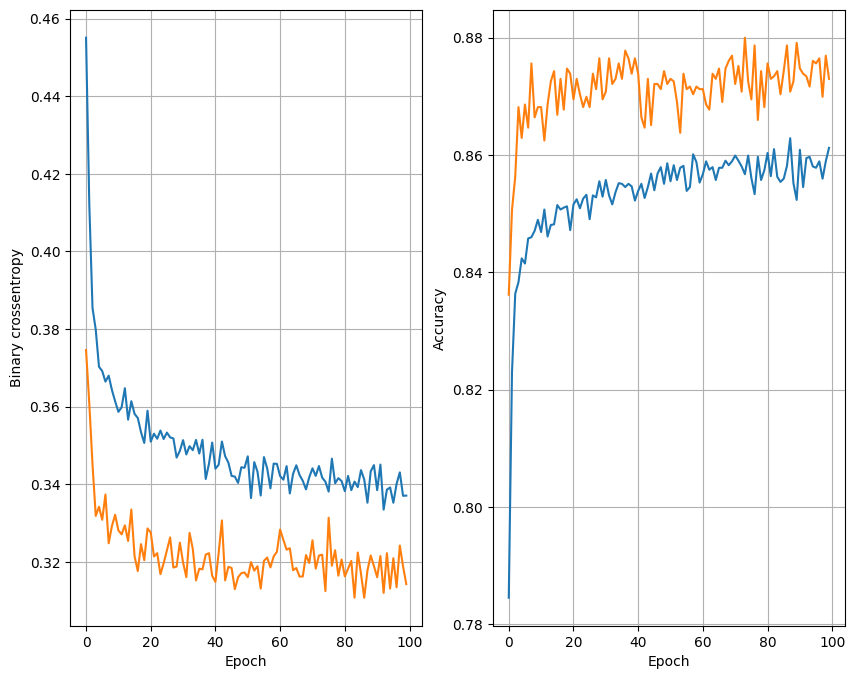

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8741 - loss: 0.3160
16nodes,dropout0.2,lr0.01,batch size64


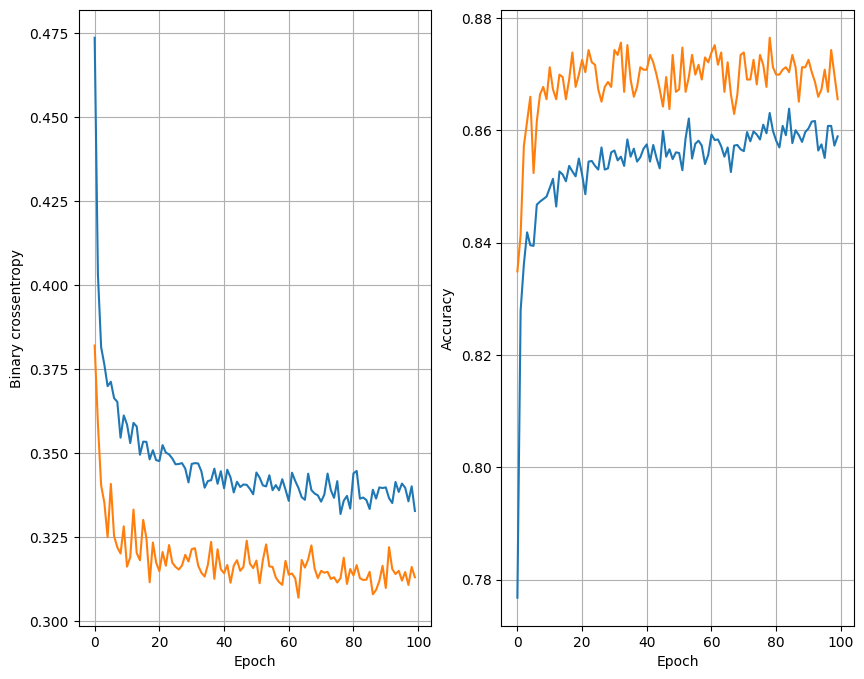

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8740 - loss: 0.3079
16nodes,dropout0.2,lr0.01,batch size128


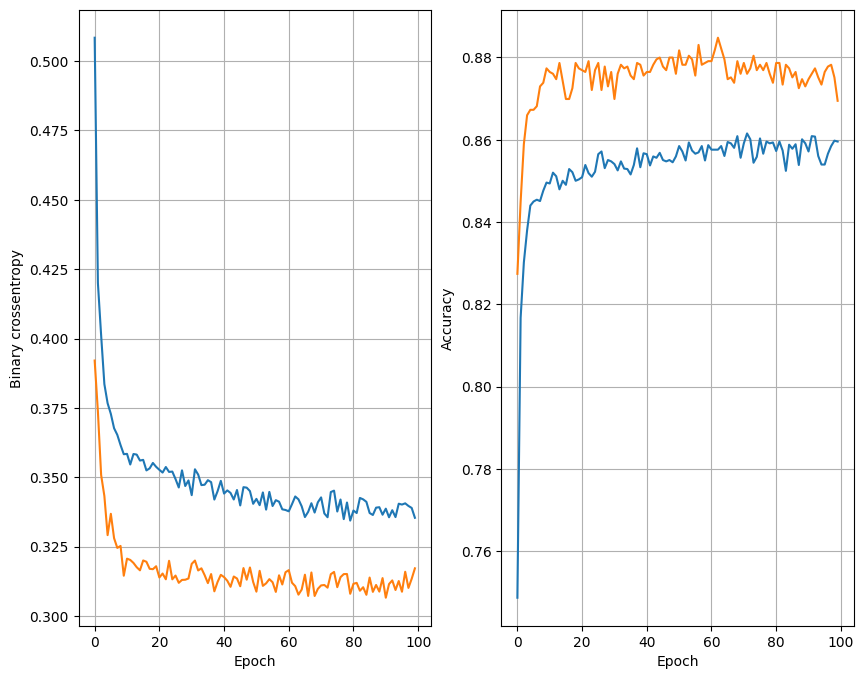

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8768 - loss: 0.3099
16nodes,dropout0.2,lr0.005,batch size32


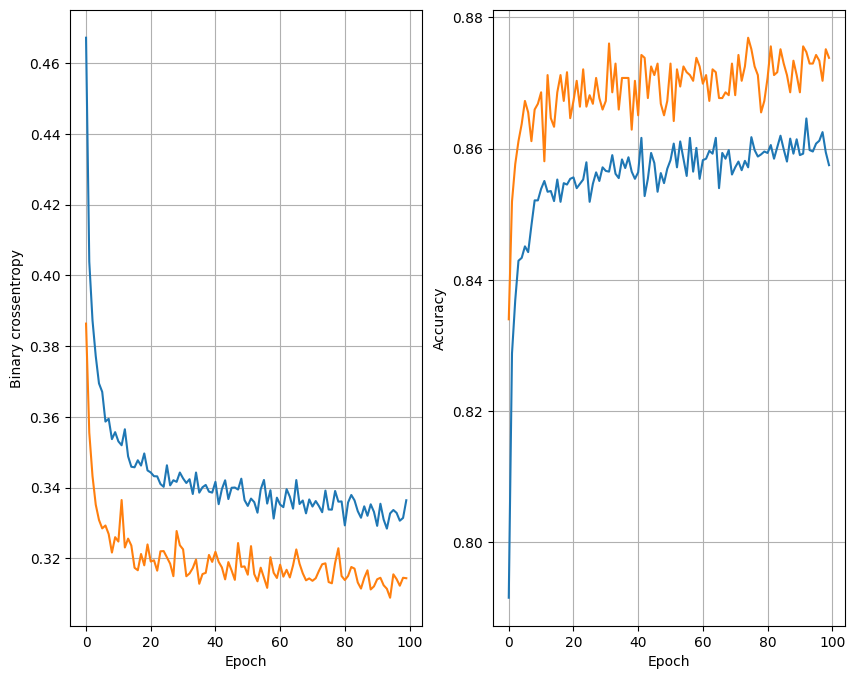

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8729 - loss: 0.3085
16nodes,dropout0.2,lr0.005,batch size64


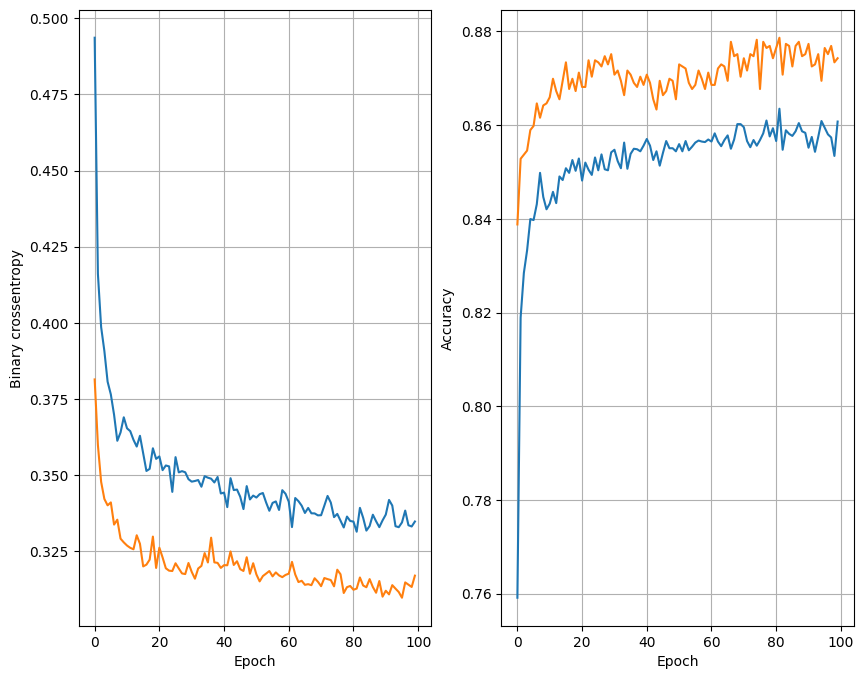

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8738 - loss: 0.3099
16nodes,dropout0.2,lr0.005,batch size128


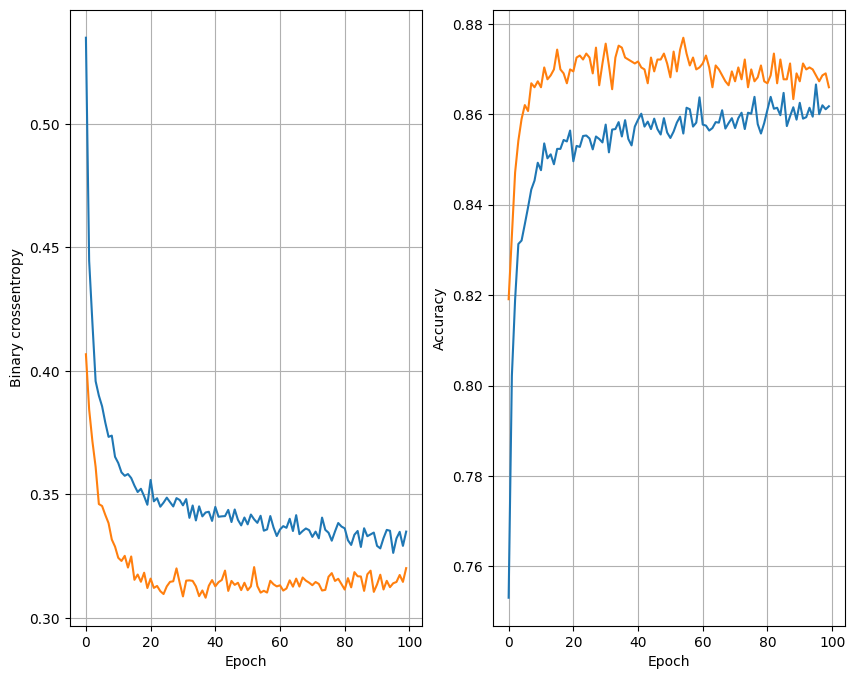

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8777 - loss: 0.3116
16nodes,dropout0.2,lr0.001,batch size32


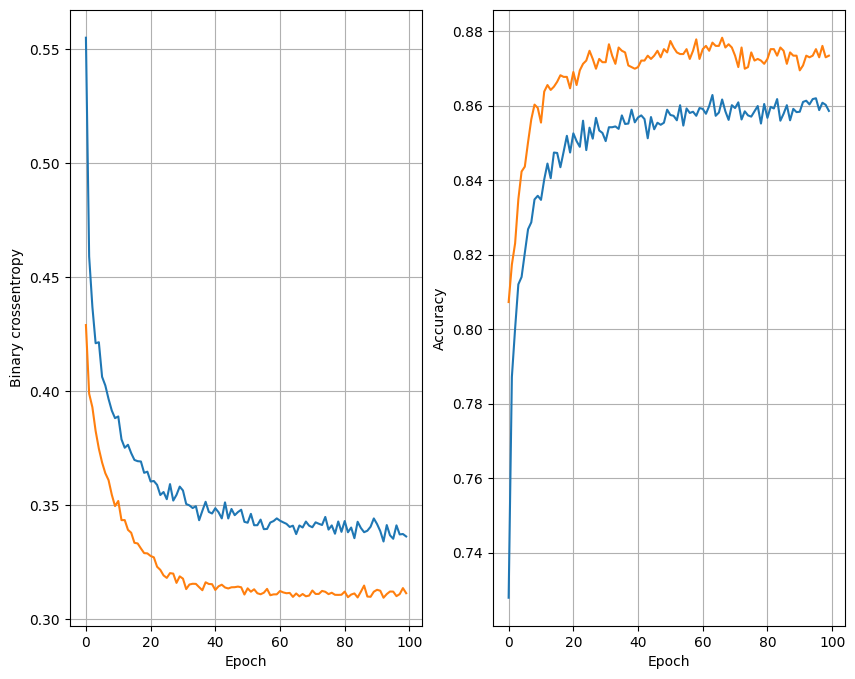

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8830 - loss: 0.3069
16nodes,dropout0.2,lr0.001,batch size64


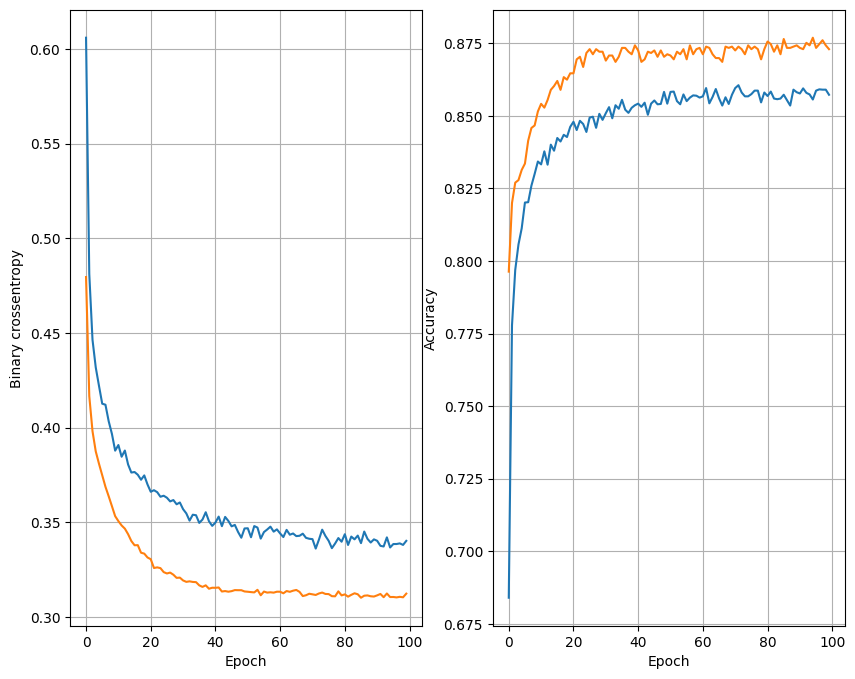

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8762 - loss: 0.3112
16nodes,dropout0.2,lr0.001,batch size128


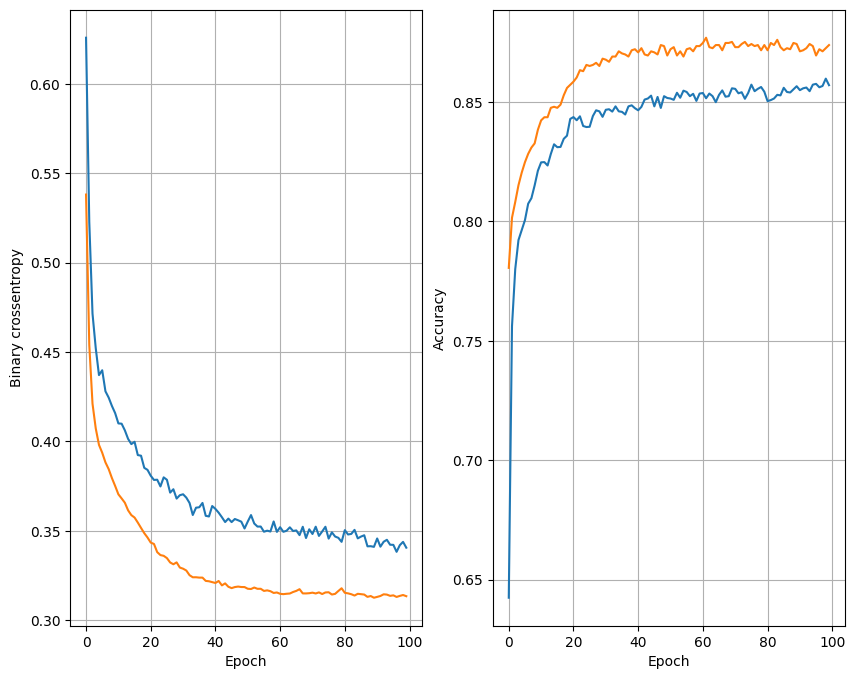

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8699 - loss: 0.3132
32nodes,dropout0,lr0.01,batch size32


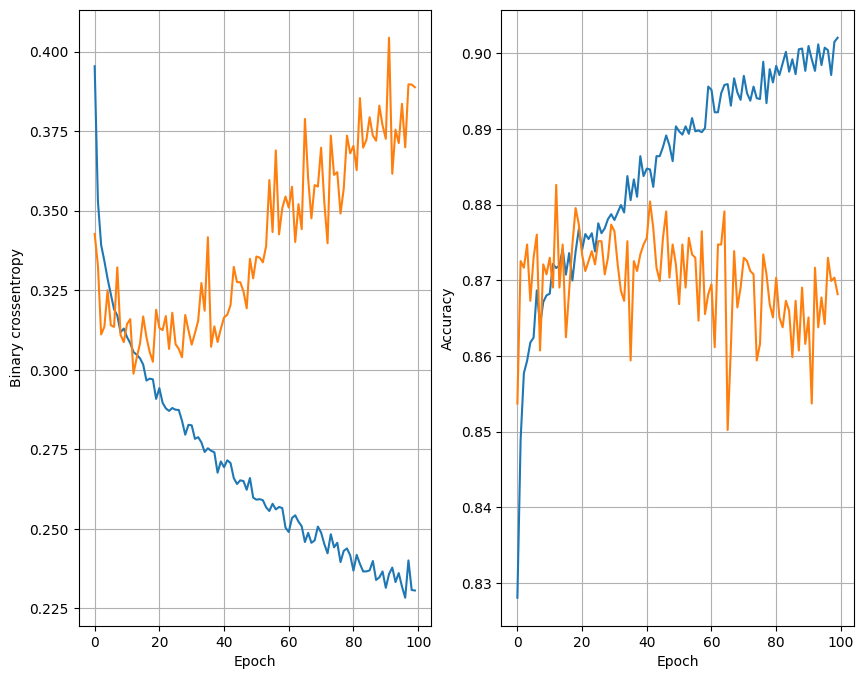

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8716 - loss: 0.3717
32nodes,dropout0,lr0.01,batch size64


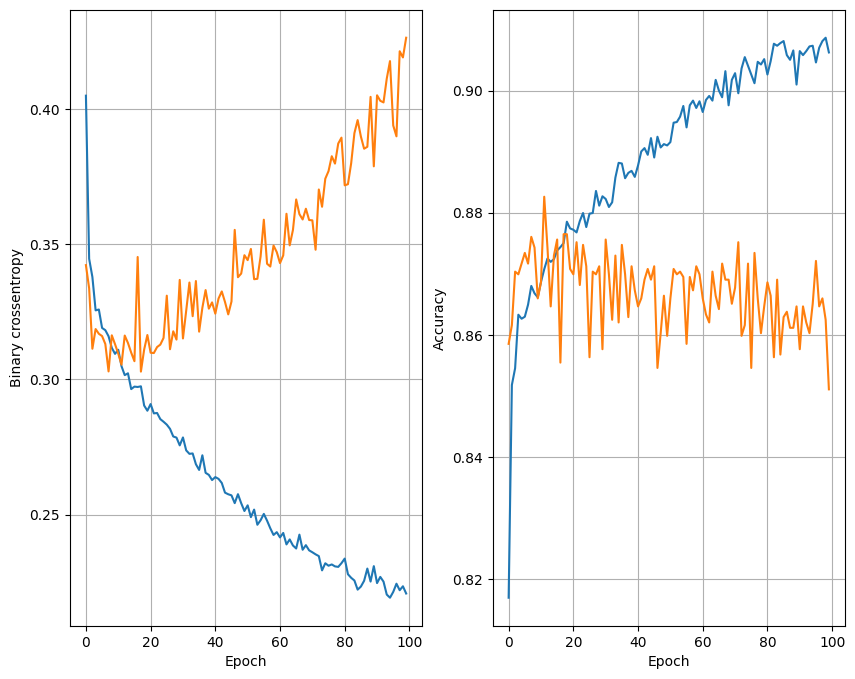

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8628 - loss: 0.3869
32nodes,dropout0,lr0.01,batch size128


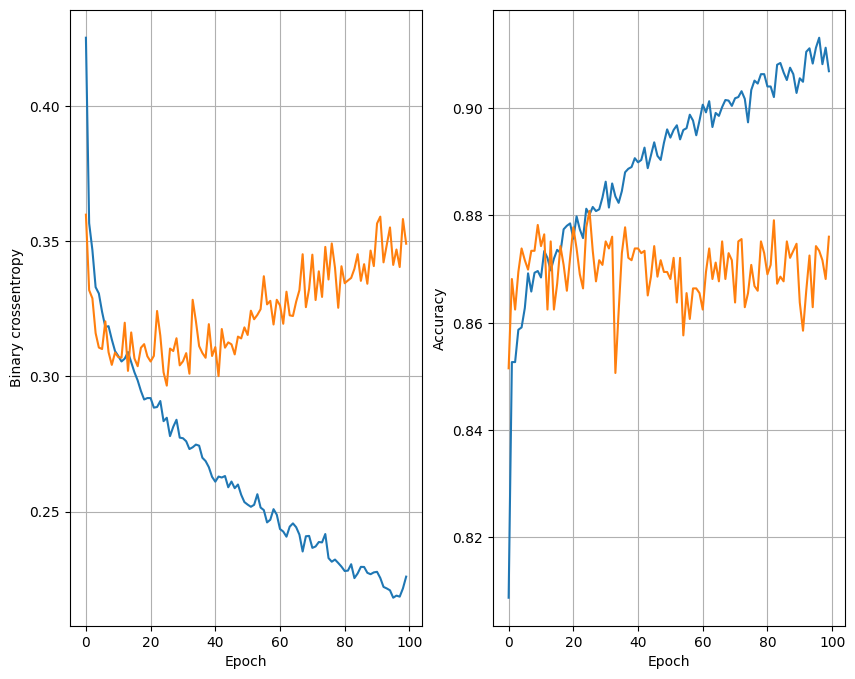

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8711 - loss: 0.3575
32nodes,dropout0,lr0.005,batch size32


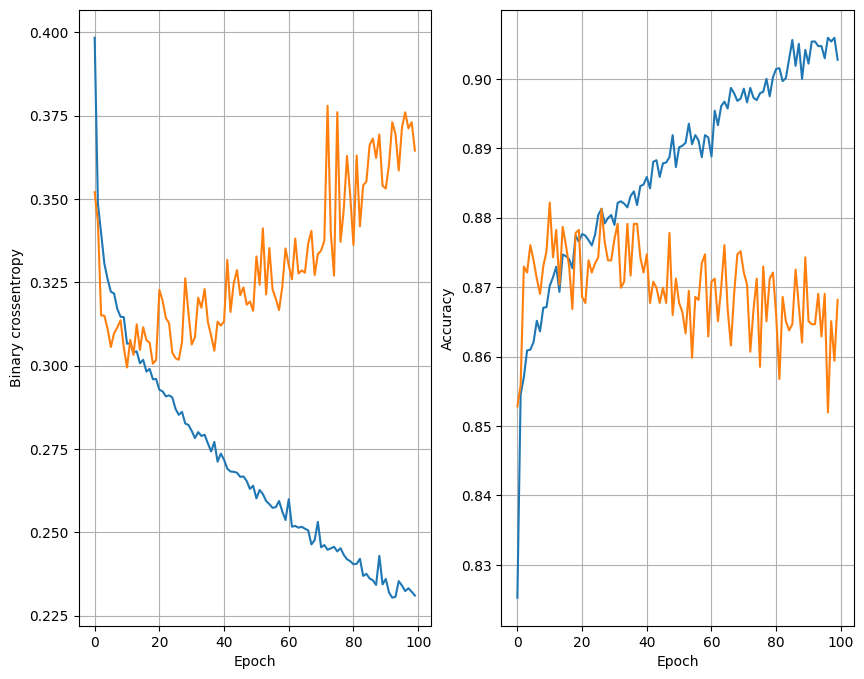

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8654 - loss: 0.3623
32nodes,dropout0,lr0.005,batch size64


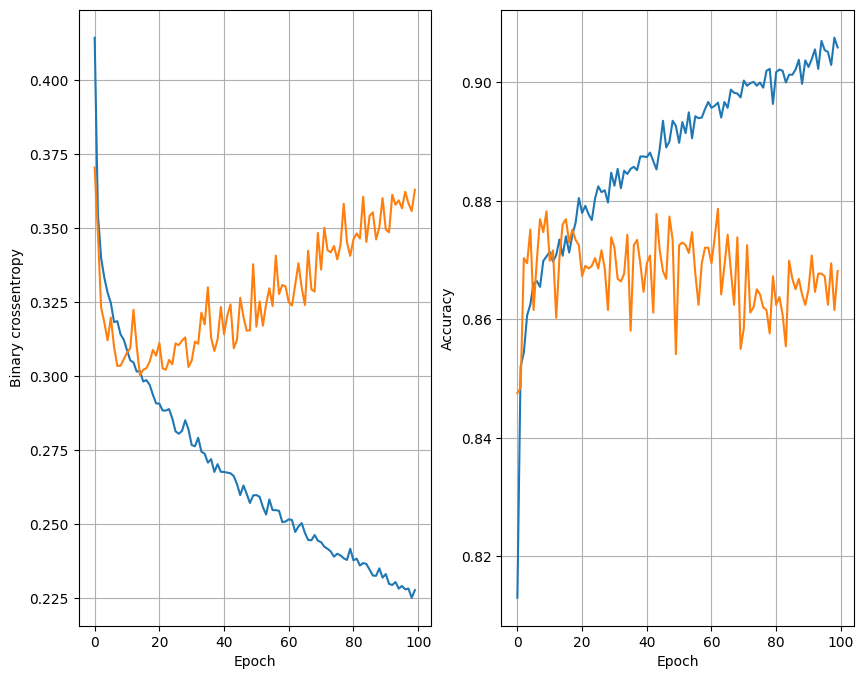

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8728 - loss: 0.3564
32nodes,dropout0,lr0.005,batch size128


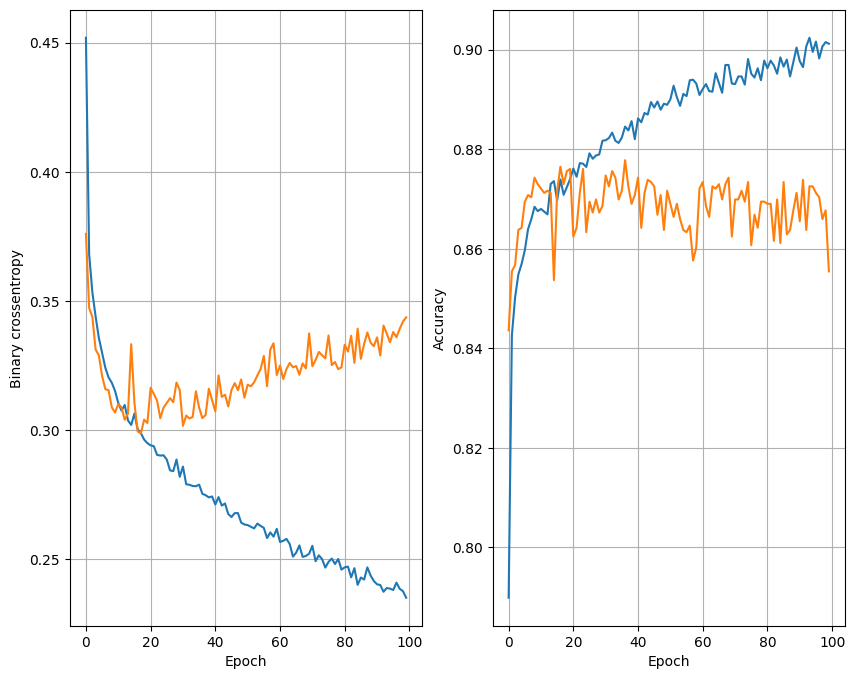

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8753 - loss: 0.3250
32nodes,dropout0,lr0.001,batch size32


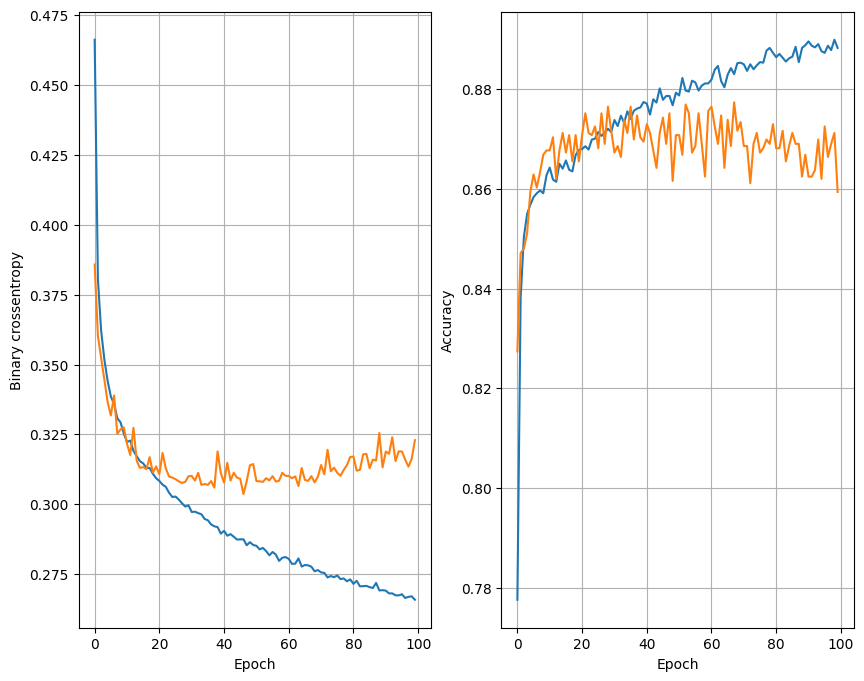

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8728 - loss: 0.3114
32nodes,dropout0,lr0.001,batch size64


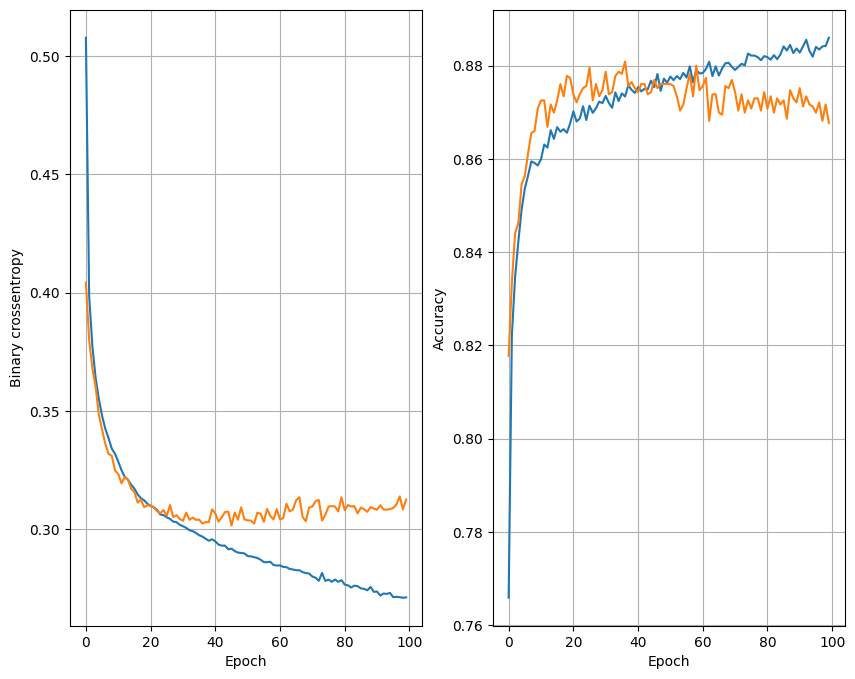

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8738 - loss: 0.3004
32nodes,dropout0,lr0.001,batch size128


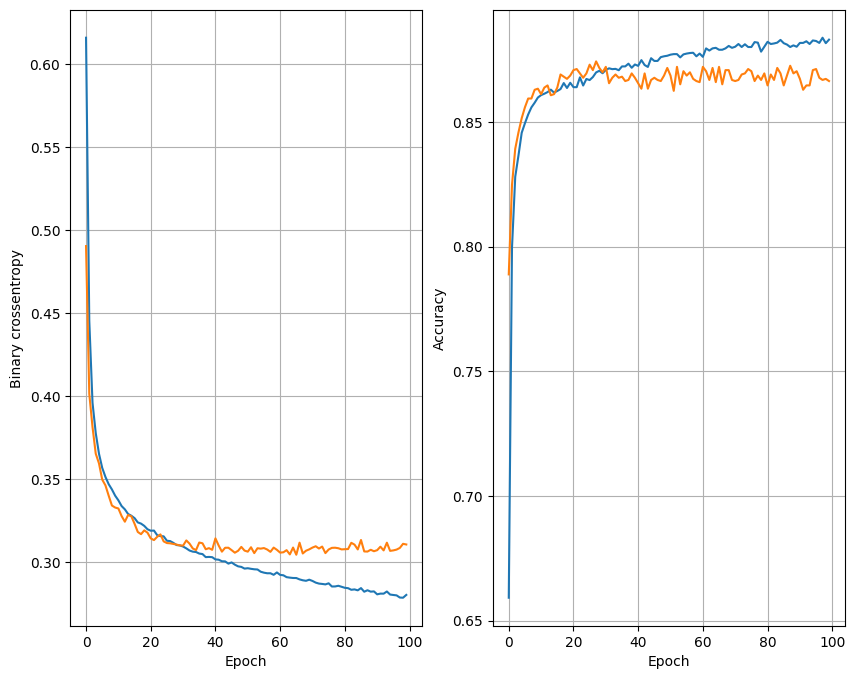

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8827 - loss: 0.2925
32nodes,dropout0.2,lr0.01,batch size32


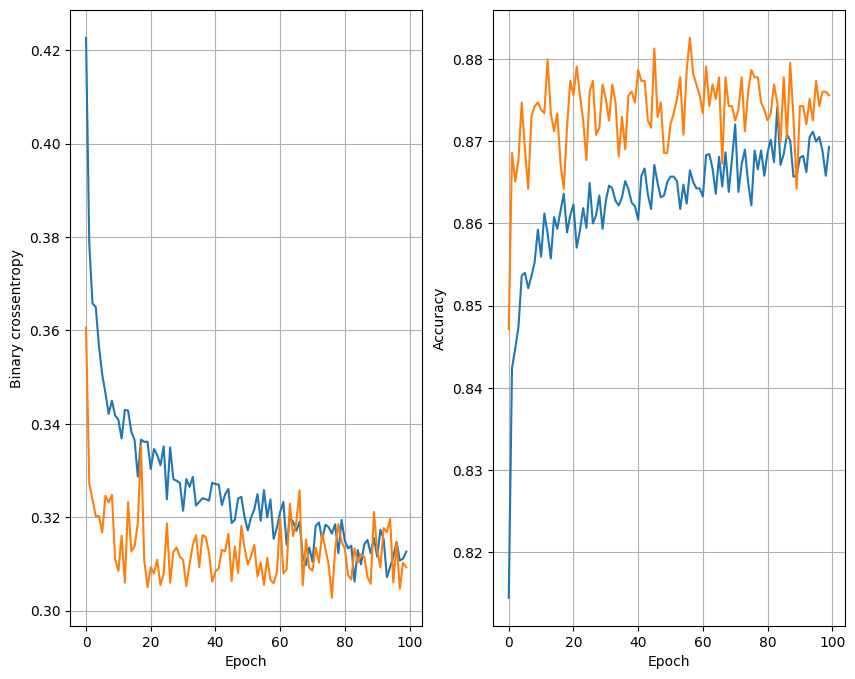

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8752 - loss: 0.3092
32nodes,dropout0.2,lr0.01,batch size64


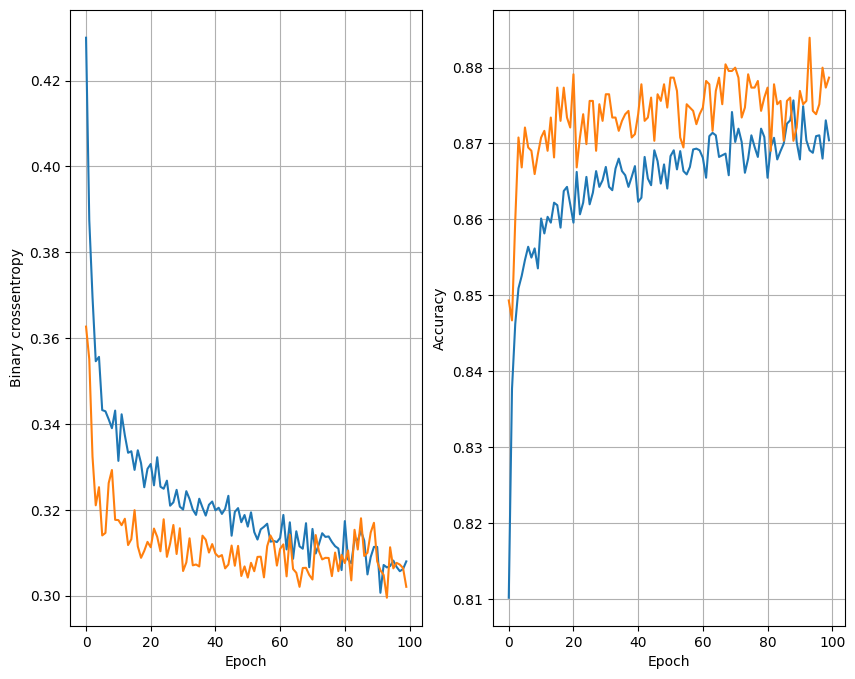

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8756 - loss: 0.2931
32nodes,dropout0.2,lr0.01,batch size128


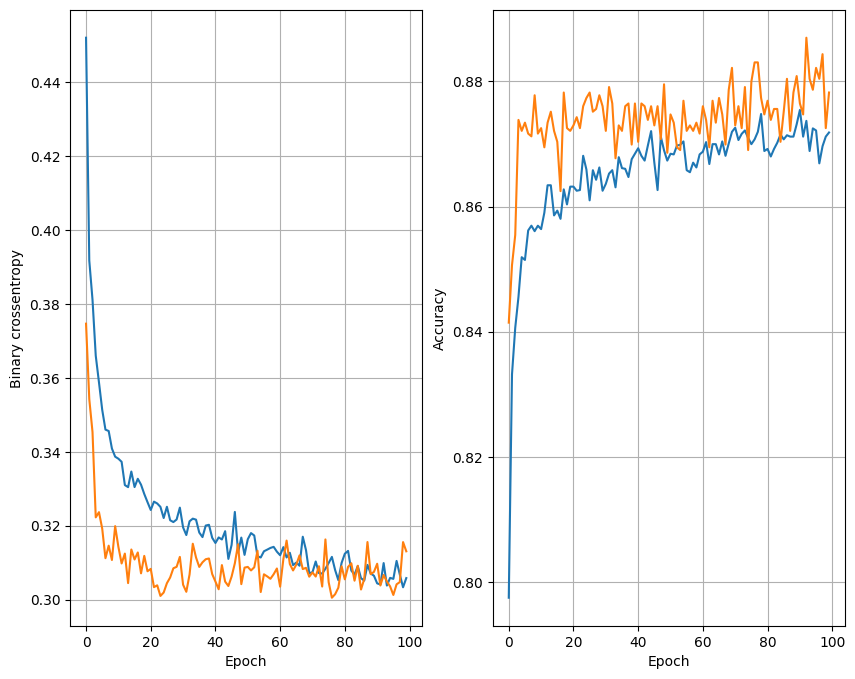

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8771 - loss: 0.2924
32nodes,dropout0.2,lr0.005,batch size32


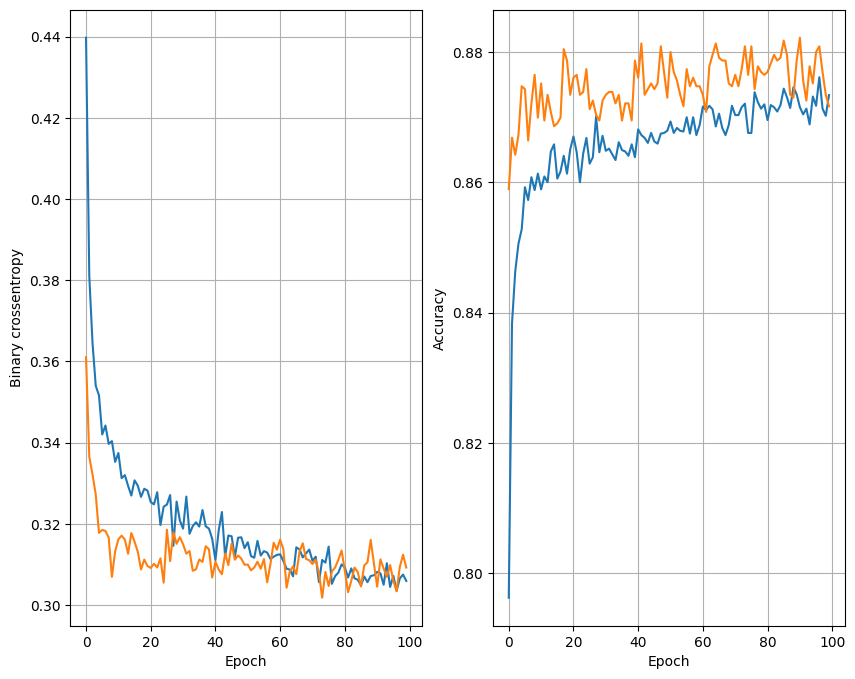

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8796 - loss: 0.3052
32nodes,dropout0.2,lr0.005,batch size64


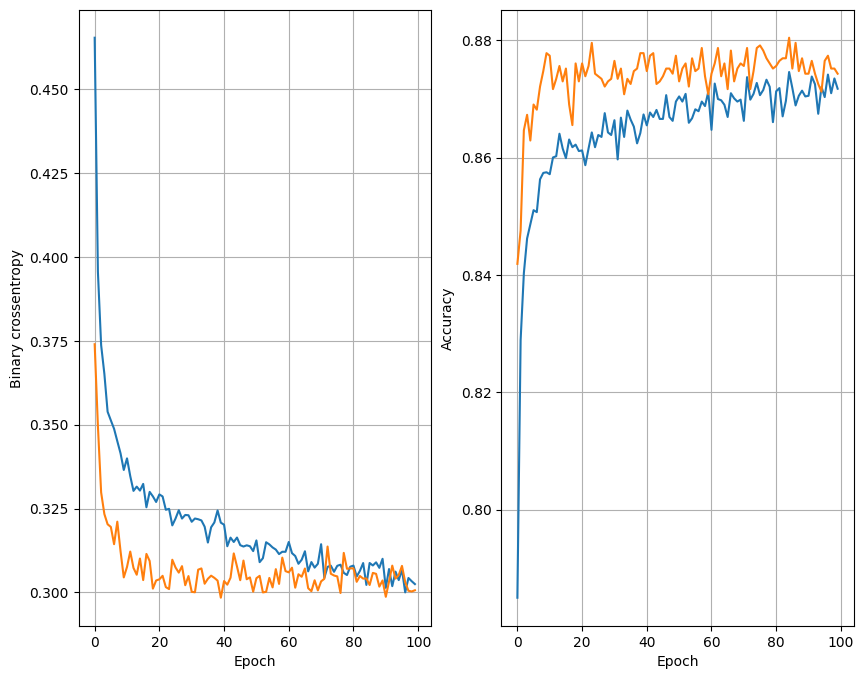

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8747 - loss: 0.2998
32nodes,dropout0.2,lr0.005,batch size128


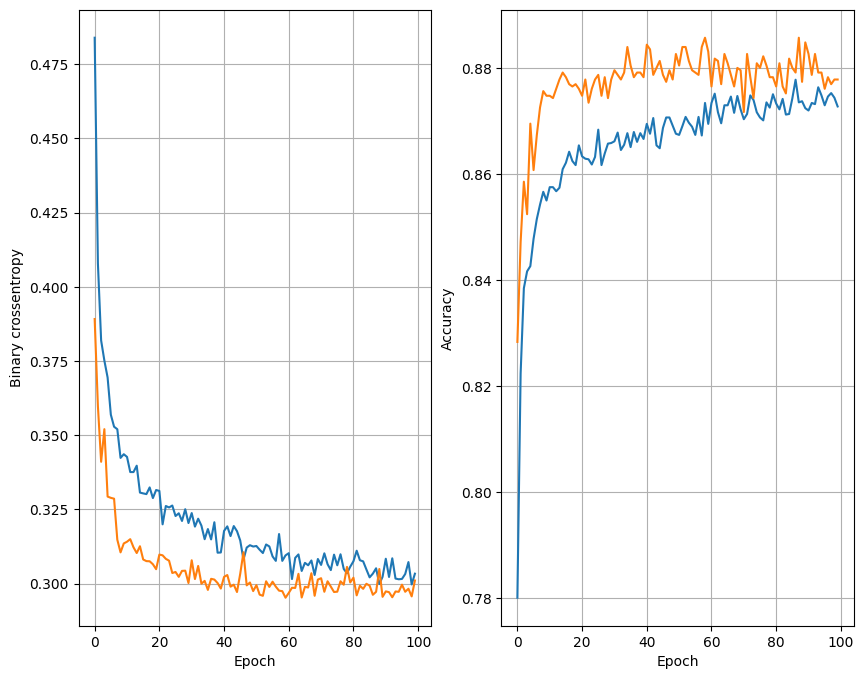

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8797 - loss: 0.2913
32nodes,dropout0.2,lr0.001,batch size32


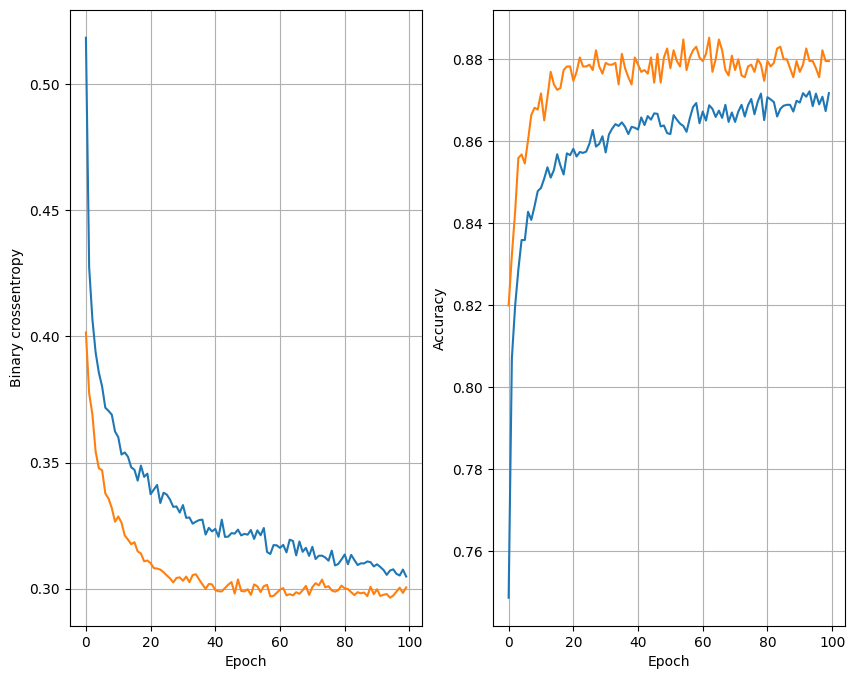

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8753 - loss: 0.2979
32nodes,dropout0.2,lr0.001,batch size64


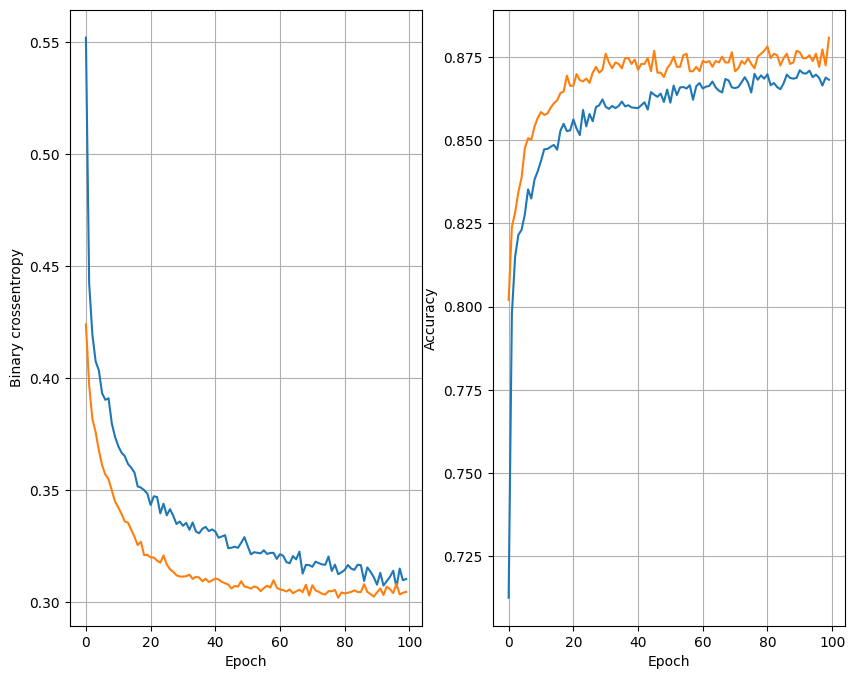

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8787 - loss: 0.2944
32nodes,dropout0.2,lr0.001,batch size128


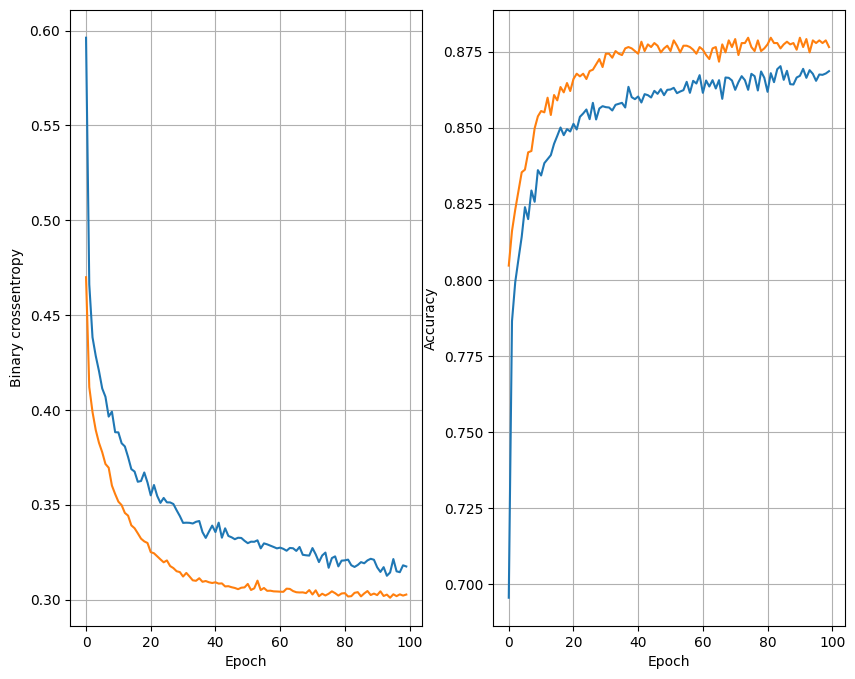

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8820 - loss: 0.2969
64nodes,dropout0,lr0.01,batch size32


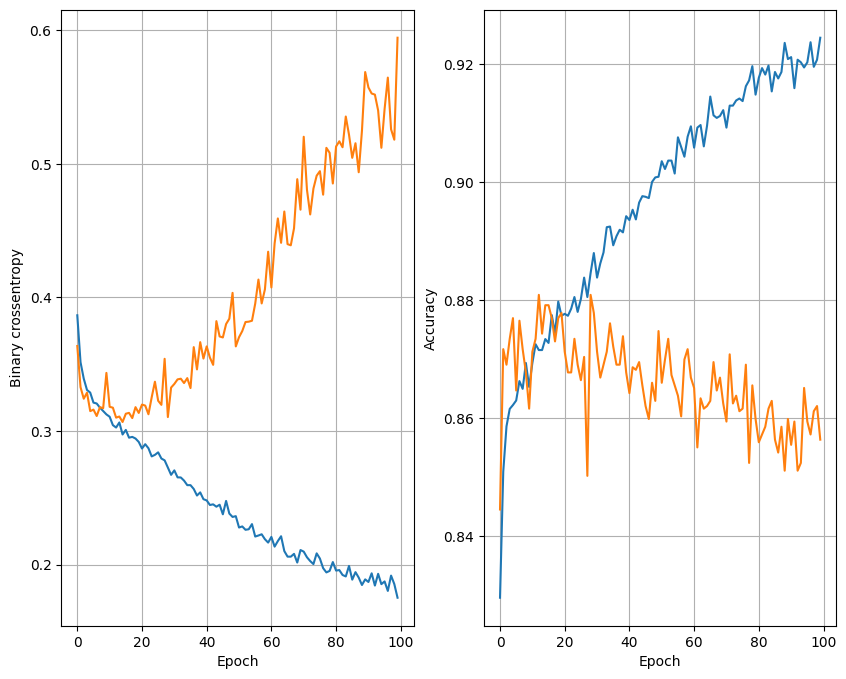

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8561 - loss: 0.5363
64nodes,dropout0,lr0.01,batch size64


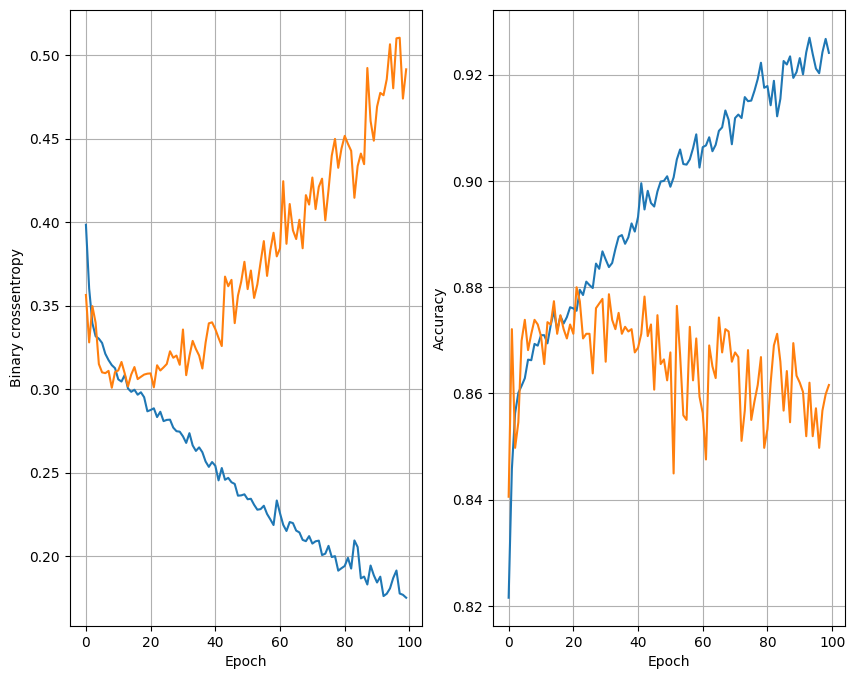

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8627 - loss: 0.4971
64nodes,dropout0,lr0.01,batch size128


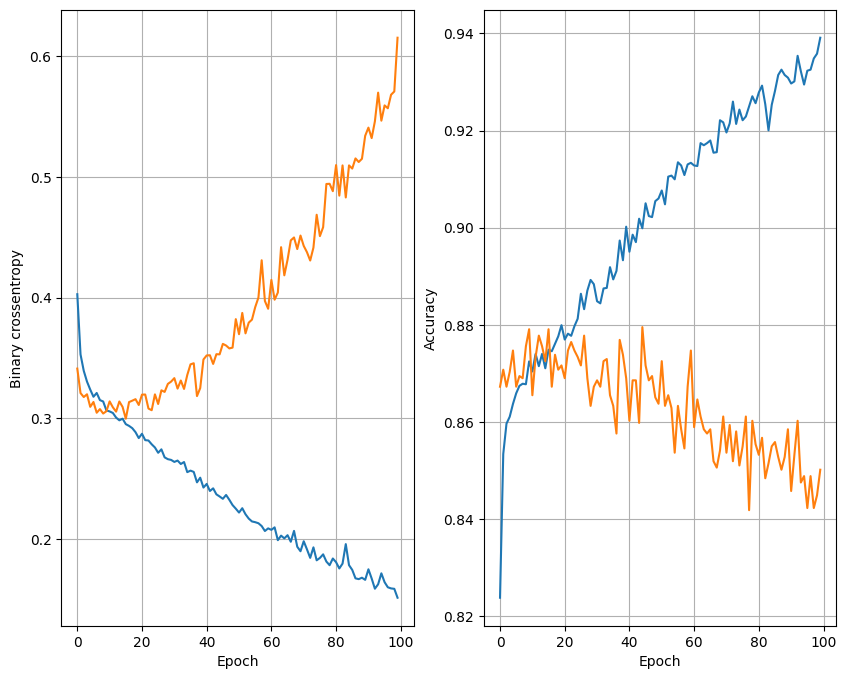

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8689 - loss: 0.5147
64nodes,dropout0,lr0.005,batch size32


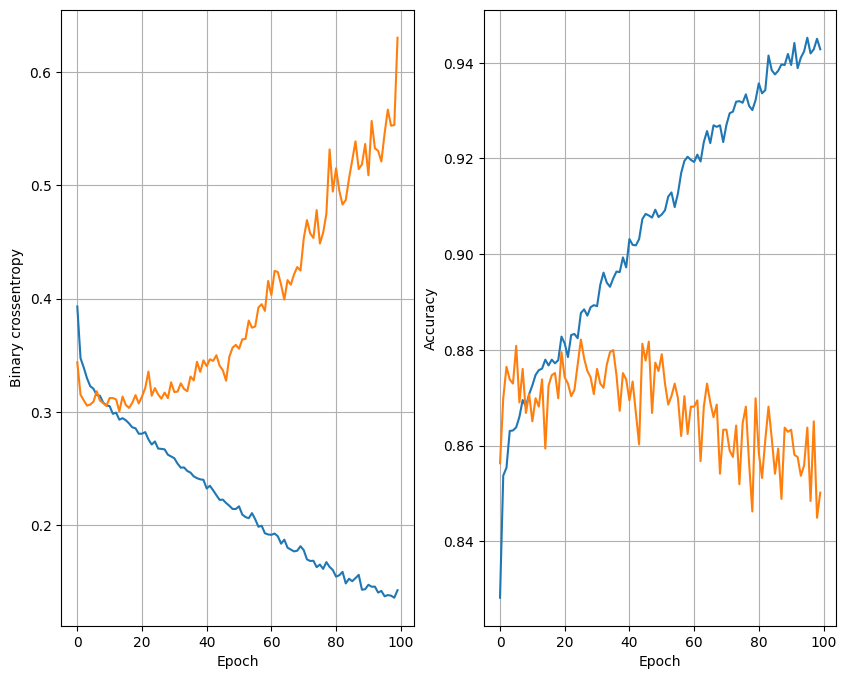

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8491 - loss: 0.6542
64nodes,dropout0,lr0.005,batch size64


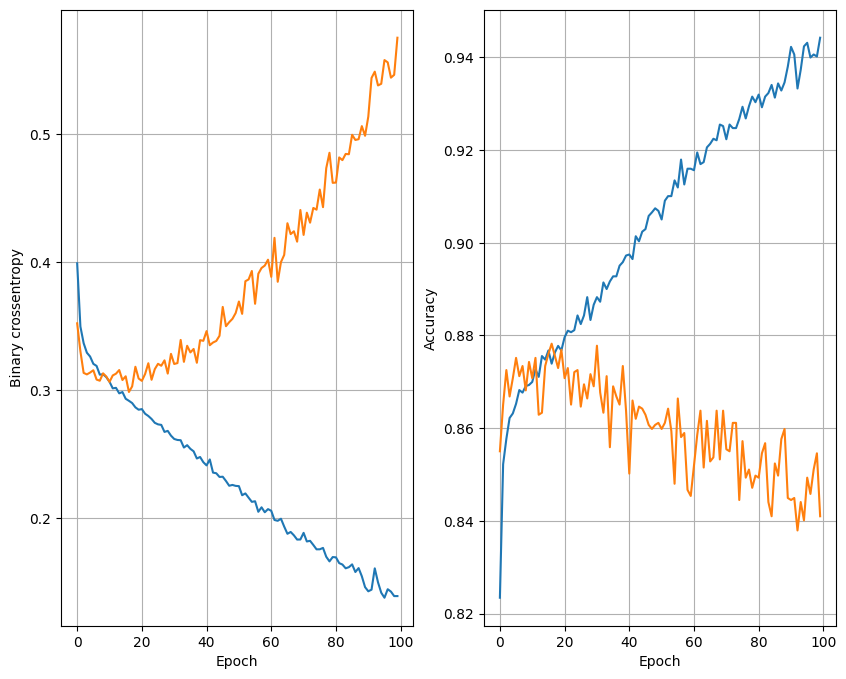

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8575 - loss: 0.5431
64nodes,dropout0,lr0.005,batch size128


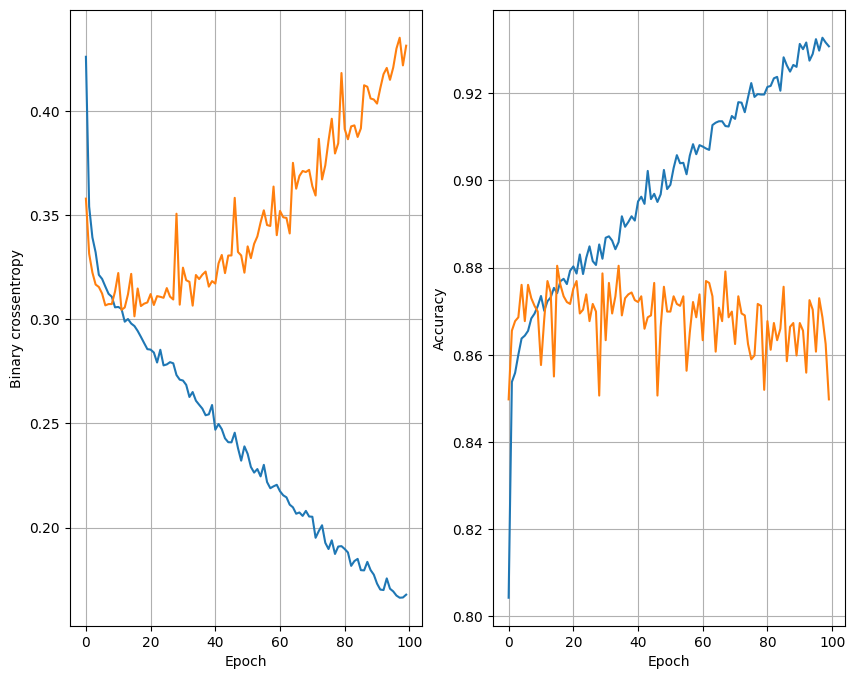

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8565 - loss: 0.4308
64nodes,dropout0,lr0.001,batch size32


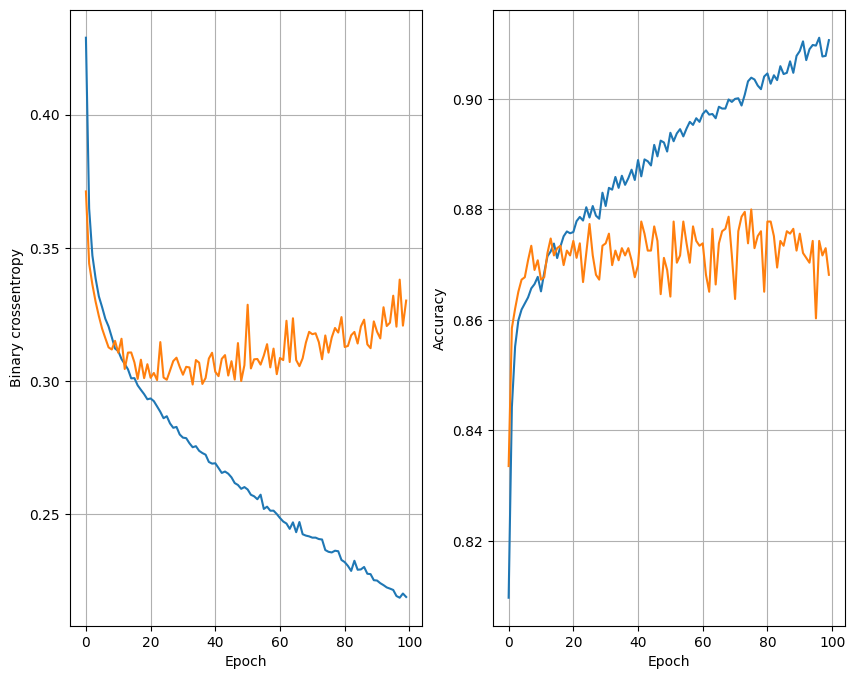

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8706 - loss: 0.3191
64nodes,dropout0,lr0.001,batch size64


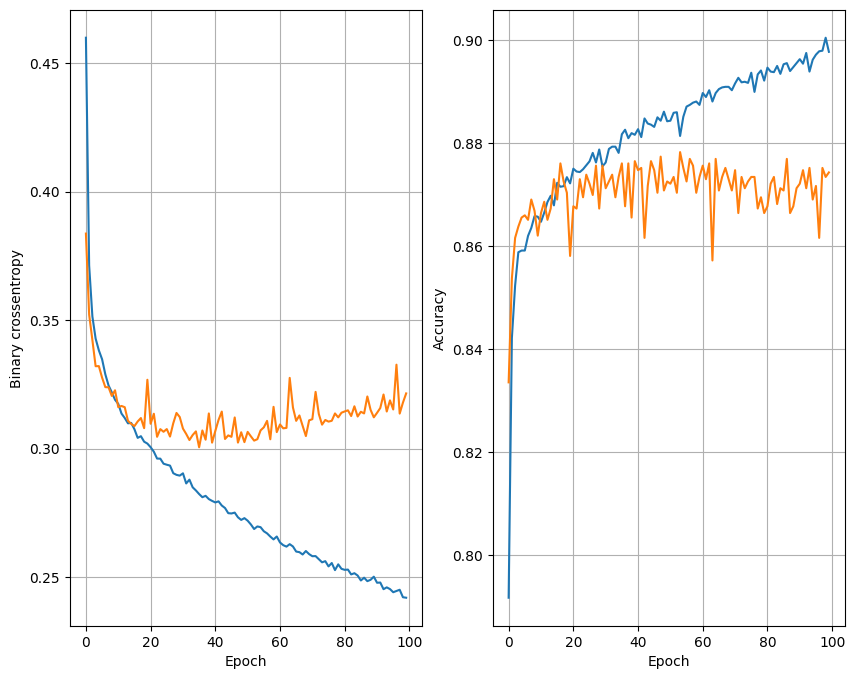

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8791 - loss: 0.3082
64nodes,dropout0,lr0.001,batch size128


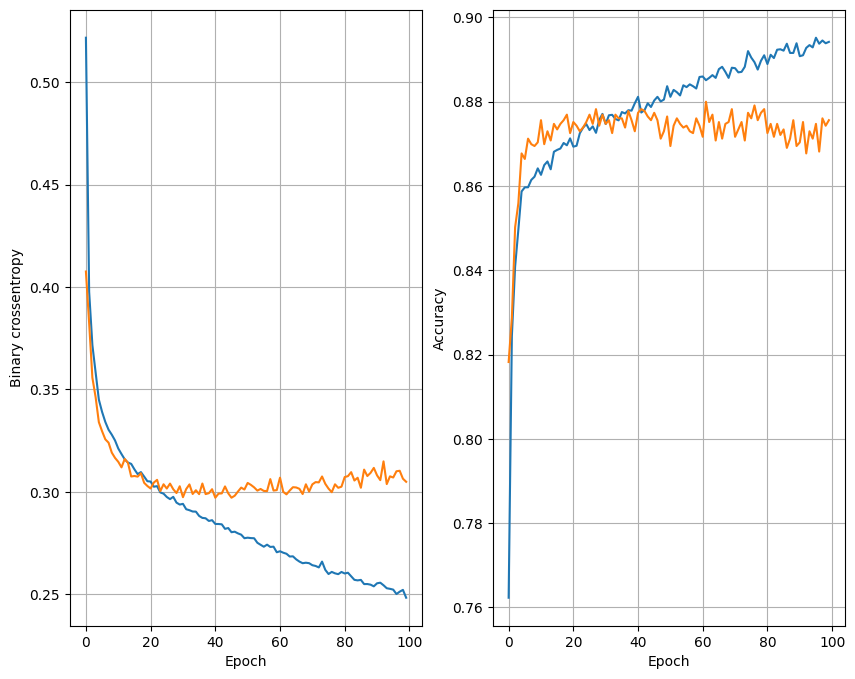

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8830 - loss: 0.2908
64nodes,dropout0.2,lr0.01,batch size32


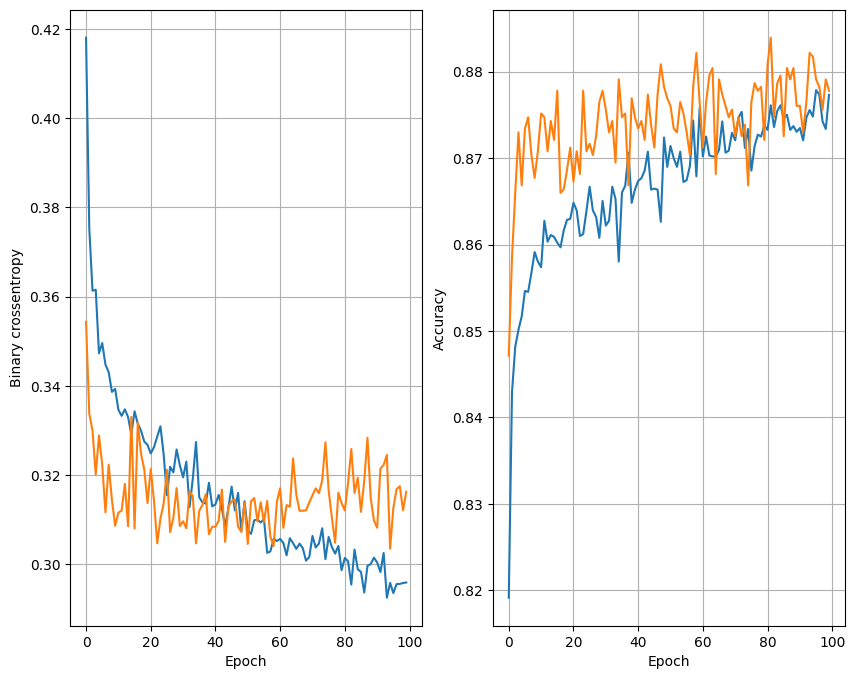

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8790 - loss: 0.3072
64nodes,dropout0.2,lr0.01,batch size64


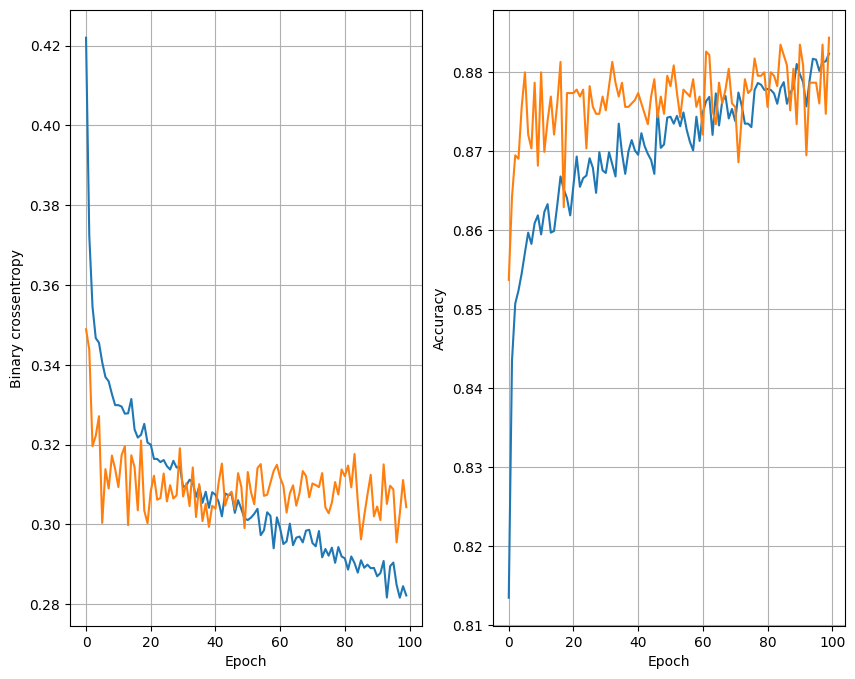

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8799 - loss: 0.2983
64nodes,dropout0.2,lr0.01,batch size128


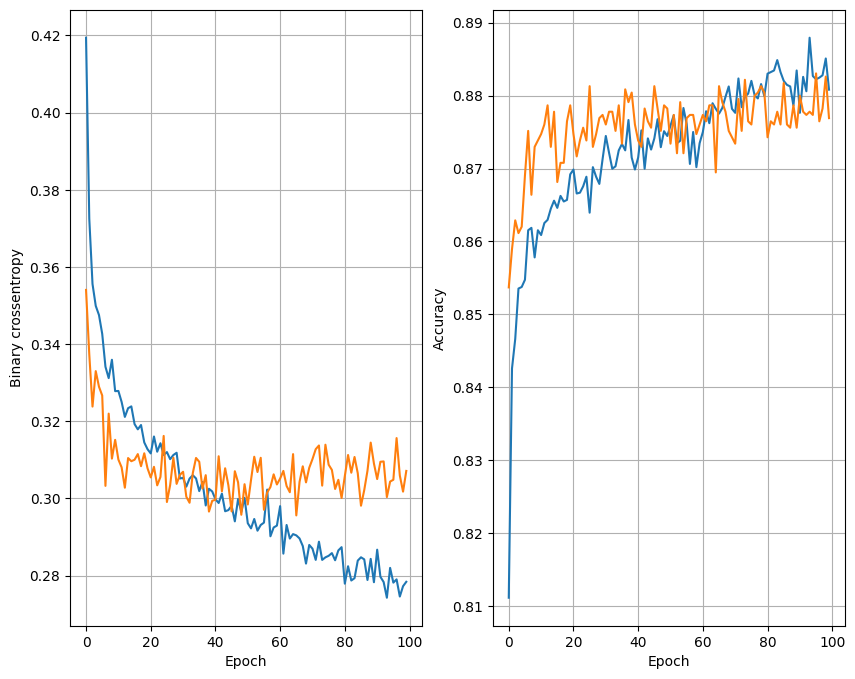

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8812 - loss: 0.2994
64nodes,dropout0.2,lr0.005,batch size32


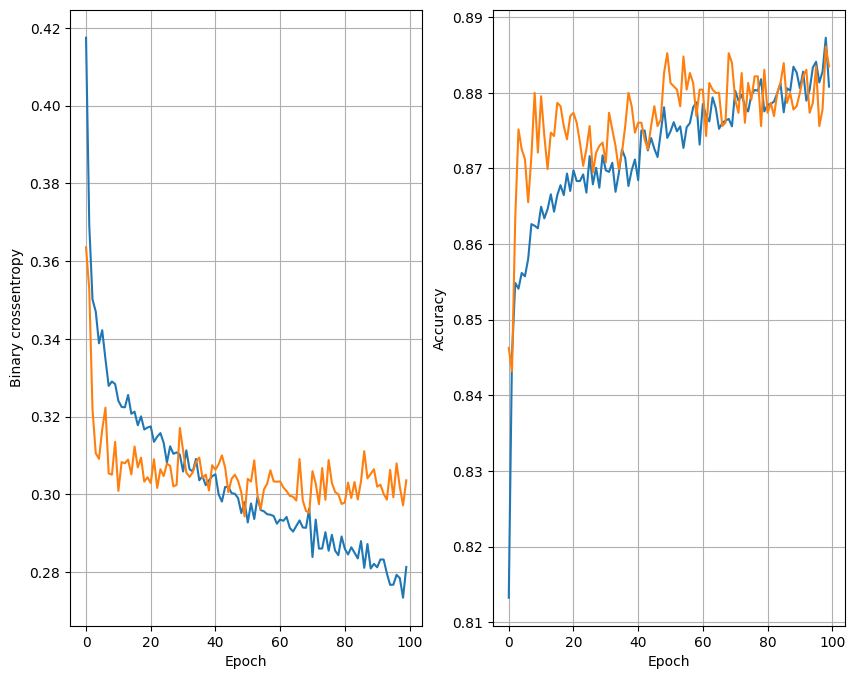

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8731 - loss: 0.3010
64nodes,dropout0.2,lr0.005,batch size64


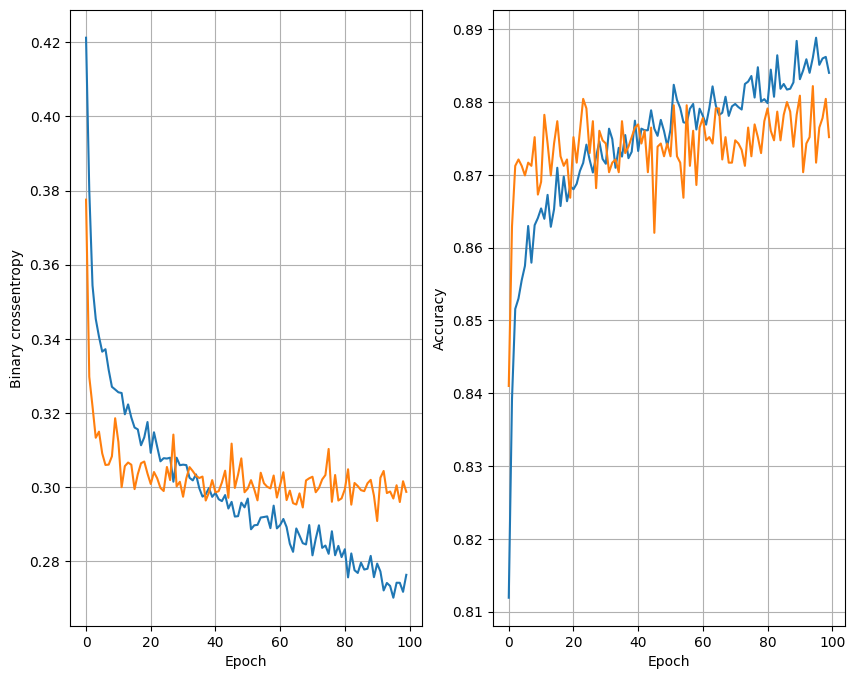

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8811 - loss: 0.2997
64nodes,dropout0.2,lr0.005,batch size128


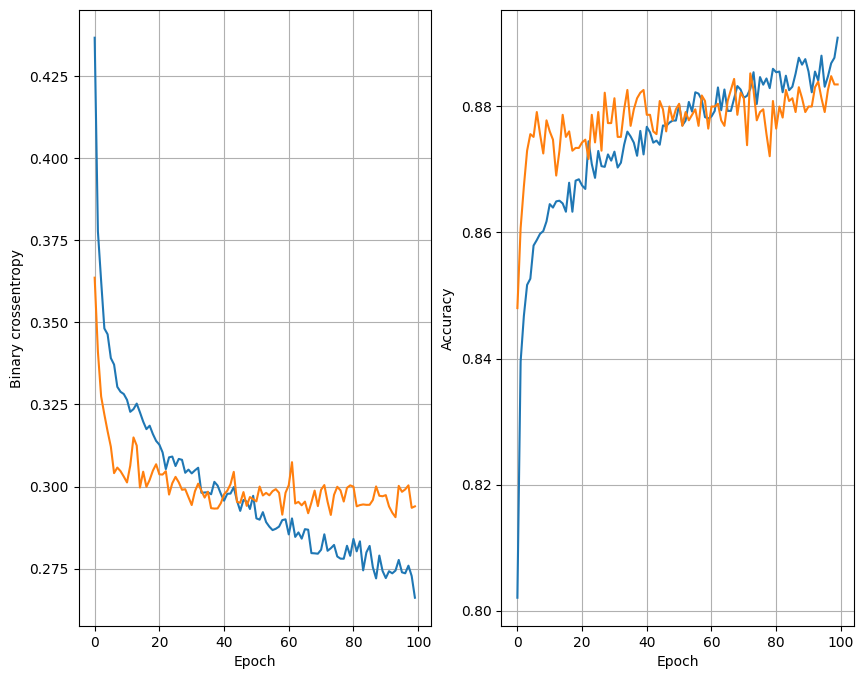

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8800 - loss: 0.2902
64nodes,dropout0.2,lr0.001,batch size32


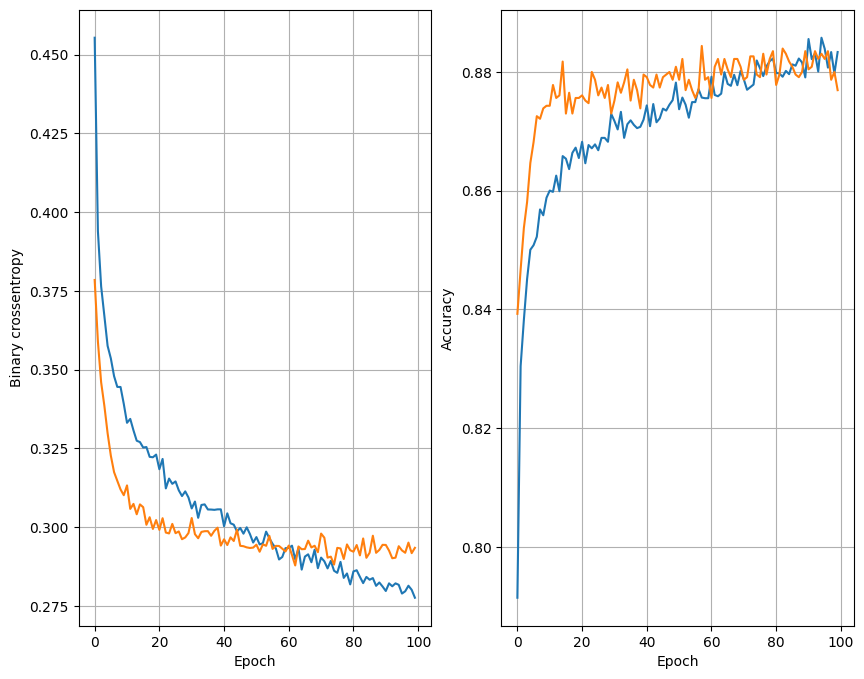

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8814 - loss: 0.2837
64nodes,dropout0.2,lr0.001,batch size64


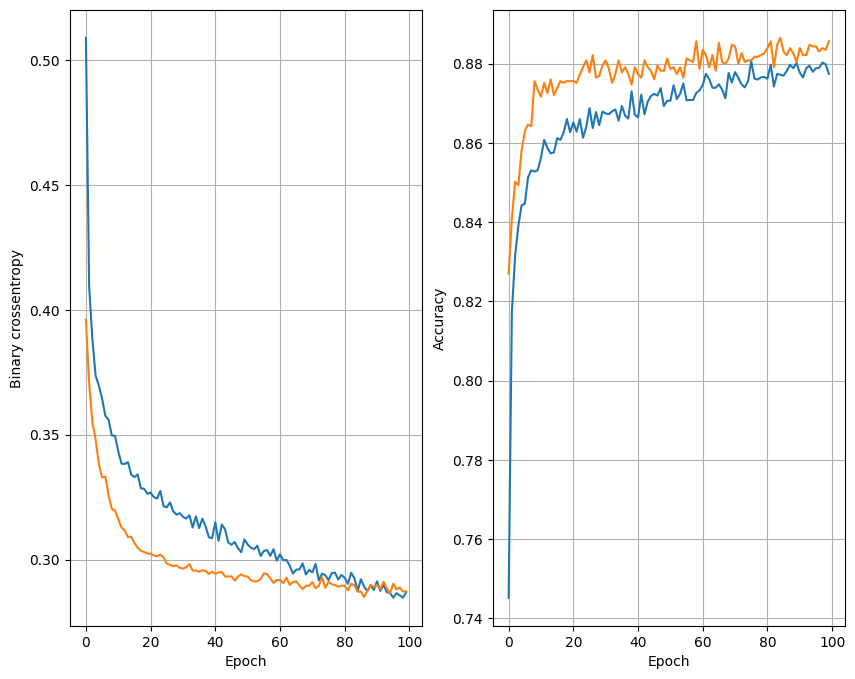

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8854 - loss: 0.2827
64nodes,dropout0.2,lr0.001,batch size128


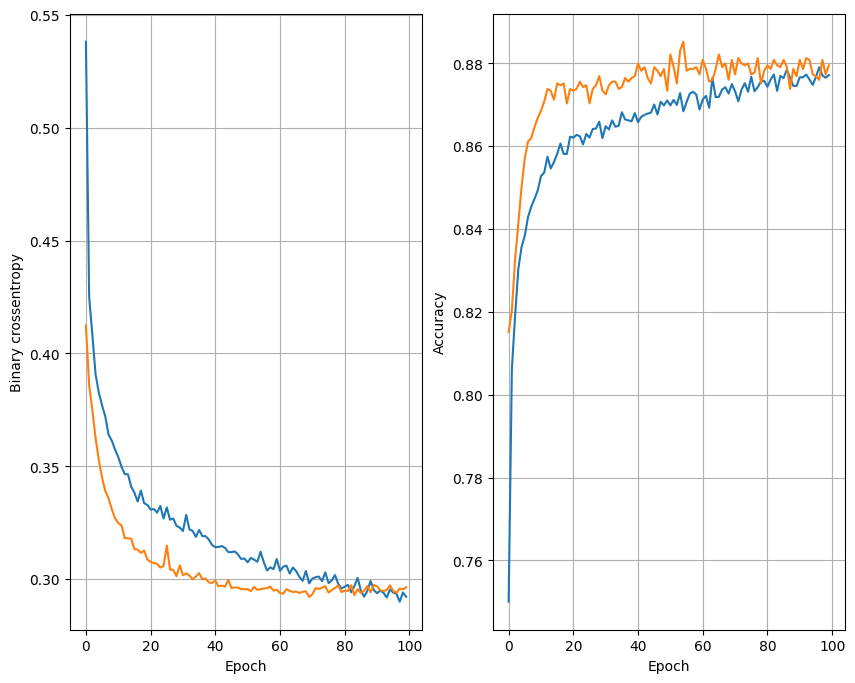

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8862 - loss: 0.2874


In [108]:
least_val_loss=float('inf')
least_loss_model=None
epochs=100
for num_nodes in[16,32,64]:
  for dropout_prob in[0,0.2]:
    for lr in[0.01,0.005,0.001]:
      for batch_size in[32,64,128]:
        print(f"{num_nodes}nodes,dropout{dropout_prob},lr{lr},batch size{batch_size}")
        model,history=train_model(x_train,y_train,num_nodes,dropout_prob,lr,batch_size,epochs)
        plot_history(history)
        val_loss=model.evaluate(x_valid,y_valid)
